# Preparation

In [1]:
# This file is based on: 5_presence_of_accident_corr for local environment
# Correlation, Regression, Feature selection
# Random forest classification

In [2]:
import torch
torch.cuda.empty_cache() 

In [3]:
import os 
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import cv2
import urllib.request
from PIL import Image

In [4]:
import pandas as pd
import pyproj

In [5]:
from pathlib import Path
import sklearn
import seaborn as sn
from scipy import stats
from tabulate import tabulate
import statsmodels.api as sm
import statsmodels.tools as tools

In [6]:
from mtp_function_yl import *

In [ ]:
# pip install category_encoders

In [7]:
import sklearn
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import category_encoders as ce
from sklearn import svm
# For regression
from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import PredictionErrorDisplay
import mlxtend
# For stepwise feature selection
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [8]:
from sklearn.inspection import permutation_importance

In [6]:
# import shap

In [9]:
import joblib

In [10]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [11]:
# For documentation and version control
# pip install watermark
%load_ext watermark

In [12]:
%watermark  -u -d -v -m --iversions

Last updated: 2025-01-20

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 7.29.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 158 Stepping 10, GenuineIntel
CPU cores   : 12
Architecture: 64bit

category_encoders: 2.6.4
torch            : 2.0.1
cv2              : 4.8.1
scipy            : 1.11.3
statsmodels      : 0.14.1
sklearn          : 1.5.1
seaborn          : 0.11.2
PIL              : 8.4.0
matplotlib       : 3.4.3
numpy            : 1.26.4
joblib           : 1.4.2
mlxtend          : 0.23.1
shapely          : 1.8.2
pandas           : 1.3.4
pyproj           : 3.3.1



# Data Loading and Processing

## Data loading

In [17]:
# For Science Apps
# dfacrpv = pd.read_csv('/home/yelhe/script/mtp/redo_model_input/model_acp_transformed_corr.csv')

# For local environment 
dfacrpv = pd.read_csv('../mtp_jan/model_acp_transformed_corr.csv')

In [18]:
print(dfacrpv.columns)

Index(['Nr', 'cmean', 'cmin', 'csum', 'cmax', 'cp', 'mewmin', 'megmin',
       'iemin', 'mewmax', 'megmax', 'iemax', 'mew', 'meg', 'ie', 'dbusl',
       'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw',
       'dpedcro', 'dstopsign', 'dtrafficarea', 'droad', 'droad_sl', 'dvfpath',
       'gvm_dwv', 'gvm_msp', 'gvm_asp', 'r_width', 'speedlimit',
       'bicyclecount', 'carcount', 'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4',
       'z_qnr_5', 'z_qnr_6', 'z_qnr_7', 'z_qnr_8', 'z_qnr_9', 'z_qnr_10',
       'z_qnr_11', 'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_15', 'z_qnr_16',
       'z_qnr_17', 'z_qnr_18', 'z_qnr_19', 'z_qnr_20', 'z_qnr_21', 'z_qnr_22',
       'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28',
       'z_qnr_29', 'z_qnr_30', 'z_qnr_31', 'z_qnr_32', 'z_qnr_33', 'z_knr_1',
       'z_knr_2', 'z_knr_3', 'z_knr_4', 'z_knr_5', 'z_knr_6', 'z_knr_7',
       'z_knr_8', 'z_knr_9', 'z_knr_10', 'z_knr_11', 'trafficarea_1',
       'trafficarea_2', '

## Checking correlation and multicollinearity

In [19]:
cn = ['cmean', 'cmin', 'csum', 'cmax', 'cp', 'mewmin', 'megmin',
       'iemin', 'mewmax', 'megmax', 'iemax', 'mew', 'meg', 'ie', 'dbusl',
       'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw',
       'dpedcro', 'dstopsign', 'dtrafficarea', 'droad', 'droad_sl',
       'gvm_dwv', 'gvm_msp', 'gvm_asp', 'r_width', 'speedlimit',
       'bicyclecount', 'carcount', 'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4',
       'z_qnr_5', 'z_qnr_6', 'z_qnr_7', 'z_qnr_8', 'z_qnr_9', 'z_qnr_10',
       'z_qnr_11', 'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_15', 'z_qnr_16',
       'z_qnr_17', 'z_qnr_18', 'z_qnr_19', 'z_qnr_20', 'z_qnr_21', 'z_qnr_22',
       'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28',
       'z_qnr_29', 'z_qnr_30', 'z_qnr_31', 'z_qnr_32', 'z_qnr_33', 'z_knr_1',
       'z_knr_2', 'z_knr_3', 'z_knr_4', 'z_knr_5', 'z_knr_6', 'z_knr_7',
       'z_knr_8', 'z_knr_9', 'z_knr_10', 'z_knr_11', 'trafficarea_1',
       'trafficarea_2', 'r_width_1', 'r_width_2', 'r_width_3', 'r_width_4',
       'r_width_5', 'r_width_6', 'speedlimit_1', 'speedlimit_2',
       'speedlimit_3', 'speedlimit_4', 'speedlimit_5', 'speedlimit_6']

# n_th dummy variables, not-good-resource variable were already removed
# Need to remove dvfpath, which is generated from the same data with qseudo points
## Which is: dvfpath is 0 for all pseudo points, since the pseudo points were generated as random points distributed on it.

In [20]:
print(len(cn))

91


In [107]:
dfi = dfacrpv[cn]

In [108]:
# Check correlation
corr_m = dfi.corr()
sorted_corrm = corr_m.unstack().sort_values()
upper_corrm = corr_m.where(
                np.triu(np.ones(corr_m.shape),k = 1).astype(bool))
unique_corrpair = upper_corrm.unstack().dropna()
sorted_uni_cp = unique_corrpair.sort_values()
dfsucp = sorted_uni_cp.to_frame()

In [109]:
# dfsucp.to_csv('/home/yelhe/script/mtp/tables/AfterRedoTransformation/correlation.csv',index = True)

In [110]:
dfsucp = dfsucp.rename(columns = {0:'corr'})

In [111]:
dfcorr_high = dfsucp.loc[(dfsucp['corr'] <= -0.8) | (dfsucp['corr'] >= 0.8)]

In [112]:
dfcorr_high

,,corr
speedlimit_4,speedlimit,-0.822594
z_knr_10,z_qnr_15,0.818377
z_knr_7,z_qnr_8,0.853376
mew,mewmax,0.853716
meg,megmin,0.859011
mew,mewmin,0.872107
cp,cmean,0.908996
ie,iemax,0.920179
cp,csum,0.927290
droad_sl,droad,0.942433


In [21]:
# Need to remove:
# speedlimit_4, z_qnr_15, z_qnr_8, mewmax, megmin, mewmin, cmean, iemax, csum, 
# droad_sl, cmax, iemin, gvm_asp, gvm_msp
cnu = ['cp', 'cmin',  
       'ie', 'mew', 'meg', 'megmax', 'dbusl',
       'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw',
       'dpedcro', 'dstopsign', 'dtrafficarea', 'droad',
       'gvm_dwv', 'r_width', 'speedlimit',
       'bicyclecount', 'carcount', 'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4',
       'z_qnr_5', 'z_qnr_6', 'z_qnr_7', 'z_qnr_9', 'z_qnr_10',
       'z_qnr_11', 'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_16',
       'z_qnr_17', 'z_qnr_18', 'z_qnr_19', 'z_qnr_20', 'z_qnr_21', 'z_qnr_22',
       'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28',
       'z_qnr_29', 'z_qnr_30', 'z_qnr_31', 'z_qnr_32', 'z_qnr_33', 'z_knr_1',
       'z_knr_2', 'z_knr_3', 'z_knr_4', 'z_knr_5', 'z_knr_6', 'z_knr_7',
       'z_knr_8', 'z_knr_9', 'z_knr_10', 'z_knr_11', 'trafficarea_1',
       'trafficarea_2', 'r_width_1', 'r_width_2', 'r_width_3', 'r_width_4',
       'r_width_5', 'r_width_6', 'speedlimit_1', 'speedlimit_2',
       'speedlimit_3', 'speedlimit_5', 'speedlimit_6']


In [114]:
# calculating VIF for each feature
X = dfacrpv[cnu]
X = tools.add_constant(X)
dfcnu_vif = pd.DataFrame()
dfcnu_vif["feature"] = X.columns
dfcnu_vif["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(dfcnu_vif)
viflow = dfcnu_vif.loc[dfcnu_vif['VIF'] <= 5]
vifl = viflow['feature'].tolist()
print(vifl, len(vifl))

E:\Anaconda\Anaconda_file\lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
E:\Anaconda\Anaconda_file\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


         feature        VIF
0          const   0.000000
1             cp   1.253093
2           cmin   1.079378
3             ie   1.202268
4            mew   1.354945
..           ...        ...
73  speedlimit_1  15.776524
74  speedlimit_2   2.002177
75  speedlimit_3   8.385828
76  speedlimit_5   2.325398
77  speedlimit_6   2.034892

[78 rows x 2 columns]
['const', 'cp', 'cmin', 'ie', 'mew', 'meg', 'megmax', 'dbusl', 'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw', 'dpedcro', 'dstopsign', 'dtrafficarea', 'droad', 'gvm_dwv', 'bicyclecount', 'carcount', 'z_qnr_25', 'z_qnr_28', 'trafficarea_1', 'trafficarea_2', 'speedlimit_2', 'speedlimit_5', 'speedlimit_6'] 28


In [115]:
# Above using pairwise correlation

In [22]:
# Following using VIF for multicollinearity
cnforvif = ['cp', 'cmin',  
       'ie', 'mew', 'meg', 'megmax', 'dbusl',
       'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw',
       'dpedcro', 'dstopsign', 'dtrafficarea', 'droad',
       'gvm_dwv', 'r_width', 'speedlimit',
       'bicyclecount', 'carcount', 'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4',
       'z_qnr_5', 'z_qnr_6', 'z_qnr_7', 'z_qnr_9', 'z_qnr_10',
       'z_qnr_11', 'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_16',
       'z_qnr_17', 'z_qnr_18', 'z_qnr_19', 'z_qnr_20', 'z_qnr_21', 'z_qnr_22',
       'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28',
       'z_qnr_29', 'z_qnr_30', 'z_qnr_31', 'z_qnr_32', 'z_qnr_33', 'z_knr_1',
       'z_knr_2', 'z_knr_3', 'z_knr_4', 'z_knr_5', 'z_knr_6', 'z_knr_7',
       'z_knr_8', 'z_knr_9', 'z_knr_10', 'z_knr_11', 'trafficarea_1',
       'trafficarea_2', 'r_width_1', 'r_width_2', 'r_width_3', 'r_width_4',
       'r_width_5', 'r_width_6', 'speedlimit_1', 'speedlimit_2',
       'speedlimit_3', 'speedlimit_5', 'speedlimit_6']

In [23]:
print(len(cnu), len(cnforvif))

77 77


In [24]:
# calculating VIF for each feature

# Remove 'z_qnr_18', 'z_qnr_19', 'z_qnr_29', 'z_qnr_30',  
# Remove 'z_qnr_16', 'z_qnr_5',  'z_qnr_20', 'z_qnr_27', 'z_qnr_10',
# Remove 'z_knr_8', 'speedlimit_1', 'z_knr_1', 'z_knr_5', 'r_width_2', 
# Remove 'z_knr_6','z_knr_4','r_width',

cntry0 = ['cp', 'cmin',
       'ie', 'mew', 'meg', 'megmax', 'dbusl',
       'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw',
       'dpedcro', 'dstopsign', 'dtrafficarea', 'droad',
       'gvm_dwv',  'speedlimit',
       'bicyclecount', 'carcount', 'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4',
        'z_qnr_6', 'z_qnr_7', 'z_qnr_9',
       'z_qnr_11', 'z_qnr_12', 'z_qnr_13', 'z_qnr_14',
       'z_qnr_17',  'z_qnr_21', 'z_qnr_22',
       'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_28',
         'z_qnr_31', 'z_qnr_32', 'z_qnr_33',
       'z_knr_2', 'z_knr_3',  'z_knr_7',
        'z_knr_9', 'z_knr_10', 'z_knr_11', 'trafficarea_1',
       'trafficarea_2', 'r_width_1',  'r_width_3', 'r_width_4',
       'r_width_5', 'r_width_6', 'speedlimit_2',
       'speedlimit_3', 'speedlimit_5', 'speedlimit_6']
X = dfacrpv[cntry0]
X = tools.add_constant(X)
dfcnu_vif1 = pd.DataFrame()
dfcnu_vif1["feature"] = X.columns
dfcnu_vif1["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(dfcnu_vif1.sort_values(by = ['VIF']))

         feature        VIF
2           cmin   1.077604
3             ie   1.170543
59  speedlimit_5   1.199438
35      z_qnr_22   1.214720
53     r_width_3   1.217752
..           ...        ...
16  dtrafficarea   2.821565
47       z_knr_9   2.870266
49      z_knr_11   3.787517
44       z_knr_2   3.964978
0          const  62.561304

[61 rows x 2 columns]


In [25]:
print(cntry0,len(cntry0))

['cp', 'cmin', 'ie', 'mew', 'meg', 'megmax', 'dbusl', 'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw', 'dpedcro', 'dstopsign', 'dtrafficarea', 'droad', 'gvm_dwv', 'speedlimit', 'bicyclecount', 'carcount', 'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_6', 'z_qnr_7', 'z_qnr_9', 'z_qnr_11', 'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_17', 'z_qnr_21', 'z_qnr_22', 'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_28', 'z_qnr_31', 'z_qnr_32', 'z_qnr_33', 'z_knr_2', 'z_knr_3', 'z_knr_7', 'z_knr_9', 'z_knr_10', 'z_knr_11', 'trafficarea_1', 'trafficarea_2', 'r_width_1', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6', 'speedlimit_2', 'speedlimit_3', 'speedlimit_5', 'speedlimit_6'] 60


In [26]:
# # calculating VIF for each feature


# cntry1 = ['cp', 'cmin', 
#        'ie', 'mew', 'meg', 'megmax', 'dbusl',
#        'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw',
#        'dpedcro', 'dstopsign', 'dtrafficarea', 'droad', 
#        'gvm_dwv', 'r_width', 'speedlimit',
#        'bicyclecount', 'carcount']
# X = dfacrpv[cntry1]
# X = tools.add_constant(X)
# dfcnu_vif2 = pd.DataFrame()
# dfcnu_vif2["feature"] = X.columns
# dfcnu_vif2["VIF"] = [variance_inflation_factor(X.values, i)
#                           for i in range(len(X.columns))]

# print(dfcnu_vif2.sort_values(by = ['VIF']))

In [27]:
cn_vif = dfcnu_vif1['feature'].tolist()
cn_vif.remove('const')
print(cn_vif, len(cn_vif))

['cp', 'cmin', 'ie', 'mew', 'meg', 'megmax', 'dbusl', 'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw', 'dpedcro', 'dstopsign', 'dtrafficarea', 'droad', 'gvm_dwv', 'speedlimit', 'bicyclecount', 'carcount', 'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_6', 'z_qnr_7', 'z_qnr_9', 'z_qnr_11', 'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_17', 'z_qnr_21', 'z_qnr_22', 'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_28', 'z_qnr_31', 'z_qnr_32', 'z_qnr_33', 'z_knr_2', 'z_knr_3', 'z_knr_7', 'z_knr_9', 'z_knr_10', 'z_knr_11', 'trafficarea_1', 'trafficarea_2', 'r_width_1', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6', 'speedlimit_2', 'speedlimit_3', 'speedlimit_5', 'speedlimit_6'] 60


In [28]:
cnvif = cn_vif

In [29]:
# Write cnvif into a text file
with open('cn_filtered.txt', 'w') as f:
    for line in cnvif:
        f.write(f"{line}\n")

In [30]:
# dfcnu_vif1.to_csv('/home/yelhe/script/mtp/tables/AfterRedoTransformation/dfcnu_VIF.csv', index = False)

In [31]:
y = dfacrpv['acp']
# x = dfacrpv[cnu]
x = dfacrpv[cnvif] # Variables after filtering with correlation and VIF (60)


# x = dfacrpv[cnvifnew] #  cnvifnew = cnvif + 'cmean' (61)
# x = dfacrpv[cntryn] # only using VIF without correlation(63)

In [32]:
# Another set cnvifnew = cnvif + 'cmean'
cnvifnew = ['cp', 'cmin','cmean',
            'ie', 'mew', 'meg', 'megmax', 'dbusl', 'dtraml', 'dtrainl', 
            'dplight', 'dstation', 'dparkcar', 'dparktw', 'dpedcro',
            'dstopsign', 'dtrafficarea', 'droad', 'gvm_dwv', 'speedlimit',
            'bicyclecount', 'carcount', 'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 
            'z_qnr_4', 'z_qnr_6', 'z_qnr_7', 'z_qnr_9', 'z_qnr_11', 'z_qnr_12',
            'z_qnr_13', 'z_qnr_14', 'z_qnr_17', 'z_qnr_21', 'z_qnr_22',
            'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_28',
            'z_qnr_31', 'z_qnr_32', 'z_qnr_33', 'z_knr_2', 'z_knr_3',
            'z_knr_7', 'z_knr_9', 'z_knr_10', 'z_knr_11', 'trafficarea_1', 
            'trafficarea_2', 'r_width_1', 'r_width_3', 'r_width_4', 
            'r_width_5', 'r_width_6', 'speedlimit_2', 'speedlimit_3', 
            'speedlimit_5', 'speedlimit_6']

In [33]:
# y.shape
x.shape
# 1087 points with 78 features in total

(1087, 60)

In [128]:
# cnvif1 = ['cp', 'cmin', 'cmean',
#           'ie', 'mew', 'meg', 'megmax', 'dbusl', 'dtraml', 'dtrainl', 'dplight',
#           'dstation', 'dparkcar', 'dparktw', 'dpedcro', 'dstopsign', 'dtrafficarea',
#           'droad', 'gvm_dwv', 'r_width', 'speedlimit', 'bicyclecount',
#           'carcount', 'z_qnr_1', 'z_qnr_7', 'z_qnr_9', 'z_qnr_10', 'z_qnr_11',
#           'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_16', 'z_qnr_17', 'z_qnr_18',
#           'z_qnr_19', 'z_qnr_20', 'z_qnr_21', 'z_qnr_22', 'z_qnr_23', 'z_qnr_24',
#           'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30',
#           'z_qnr_31', 'z_qnr_32', 'z_knr_2', 'z_knr_3', 'z_knr_5', 'z_knr_7',
#           'z_knr_10', 'trafficarea_1', 'trafficarea_2', 'r_width_1', 'r_width_2',
#           'r_width_4', 'r_width_6', 'speedlimit_2', 'speedlimit_3', 'speedlimit_5',
#           'speedlimit_6']

In [34]:
# Filtering only with VIF (just to check if the filtered result is the same)
# calculating VIF for each feature
# Remove 'speedlimit_6','z_qnr_23','z_qnr_11','z_qnr_26', 'z_qnr_10',
# Remove'r_width','z_knr_2', 'z_qnr_15','z_qnr_9', 'z_qnr_20',
# Remove 'z_qnr_8', 'z_knr_11','z_qnr_3', 'csum', 'speedlimit_4', 
# Remove'gvm_asp', 'gvm_msp',  'ie','cmax', 'mew','z_knr_8',
# Remove 'z_knr_1','meg',  'droad_sl', 'speedlimit_1', 'r_width_2', 
# Remove'z_knr_6','cmean',


cntryn = [ 'cmin', 'cp', 'mewmin', 'megmin',
       'iemin', 'mewmax', 'megmax', 'iemax', 'dbusl',
       'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw',
       'dpedcro', 'dstopsign', 'dtrafficarea', 'droad',
       'gvm_dwv', 'speedlimit',
       'bicyclecount', 'carcount', 'z_qnr_1', 'z_qnr_2', 'z_qnr_4',
       'z_qnr_5', 'z_qnr_6', 'z_qnr_7', 
        'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_16',
       'z_qnr_17', 'z_qnr_18', 'z_qnr_19',  'z_qnr_21', 'z_qnr_22',
        'z_qnr_24', 'z_qnr_25', 'z_qnr_27', 'z_qnr_28',
       'z_qnr_29', 'z_qnr_30', 'z_qnr_31', 'z_qnr_32', 'z_qnr_33',
        'z_knr_3', 'z_knr_4', 'z_knr_5', 'z_knr_7',
        'z_knr_9', 'z_knr_10', 'trafficarea_1',
       'trafficarea_2', 'r_width_1', 'r_width_3', 'r_width_4',
       'r_width_5', 'r_width_6', 'speedlimit_2',
       'speedlimit_3',  'speedlimit_5']
X = dfacrpv[cntryn]
X = tools.add_constant(X)
dfcnu_vif3 = pd.DataFrame()
dfcnu_vif3["feature"] = X.columns
dfcnu_vif3["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(dfcnu_vif3.sort_values(by = ['VIF']))

         feature        VIF
1           cmin   1.077201
63  speedlimit_5   1.187706
2             cp   1.218951
57     r_width_3   1.222679
12       dplight   1.242447
..           ...        ...
49       z_knr_4   3.131769
52       z_knr_9   3.266171
48       z_knr_3   3.424206
50       z_knr_5   4.800016
0          const  71.161222

[64 rows x 2 columns]


In [35]:
print(cntryn, len(cntryn))

['cmin', 'cp', 'mewmin', 'megmin', 'iemin', 'mewmax', 'megmax', 'iemax', 'dbusl', 'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw', 'dpedcro', 'dstopsign', 'dtrafficarea', 'droad', 'gvm_dwv', 'speedlimit', 'bicyclecount', 'carcount', 'z_qnr_1', 'z_qnr_2', 'z_qnr_4', 'z_qnr_5', 'z_qnr_6', 'z_qnr_7', 'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_16', 'z_qnr_17', 'z_qnr_18', 'z_qnr_19', 'z_qnr_21', 'z_qnr_22', 'z_qnr_24', 'z_qnr_25', 'z_qnr_27', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30', 'z_qnr_31', 'z_qnr_32', 'z_qnr_33', 'z_knr_3', 'z_knr_4', 'z_knr_5', 'z_knr_7', 'z_knr_9', 'z_knr_10', 'trafficarea_1', 'trafficarea_2', 'r_width_1', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6', 'speedlimit_2', 'speedlimit_3', 'speedlimit_5'] 63


In [36]:
print('sizes\n','cnvif',len(cnvif),'\n','cnvifnew',len(cnvifnew),'\n','cntryn',len(cntryn))

sizes
 cnvif 60 
 cnvifnew 61 
 cntryn 63


# Orginal regression model without feature selection

In [132]:
# Using updated features collection (63)

In [133]:
# # Only with curb-related variables
# xcp = dfacrpv[['cmean','cp', 'cmin', 'cmax', 'csum']]
# x_const = tools.add_constant(xcp)
# # m00_c = sm.OLS(y, x_const)
# # r00_c = m00_c.fit()
# # r00_c.summary()

# m00_log_c = sm.Logit(y,x_const, max_iter = 400)
# r00_log_c = m00_log_c.fit_regularized()
# r00_log_c.summary()

## OLS linear regression

### Without data splitting

In [134]:
# OLS
# With constant
x_const = tools.add_constant(x)
m00 = sm.OLS(y, x_const)
r00 = m00.fit()
r00.summary()

# m00 = sm.OLS(y, x)
# r00 = m00.fit()
# r00.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    acp   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     24.58
Date:                Mon, 20 Jan 2025   Prob (F-statistic):          7.56e-158
Time:                        15:10:06   Log-Likelihood:                -177.24
No. Observations:                1087   AIC:                             476.5
Df Residuals:                    1026   BIC:                             780.9
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4320      0.070      6.142      0.000       0.294       0.570
cp               -0.0344      0.010     -3.448      0.001      -0.054      -0.015
cmin             -0.0305      0.042     -0.718      0.473      -0.114       0.053
ie               -0.0265      0.022     -1.219      0.223      -0.069       0.016
mew               0.2660      0.034      7.825      0.000       0.199       0.333
meg              -0.0007      0.041     -0.017      0.987      -0.082       0.080
megmax           -0.0090      0.040     -0.225      0.822      -0.087       0.069
dbusl             0.0007      0.024      0.028      0.978      -0.046       0.047
dtraml           -0.0470      0.027     -1.732      0.084      -0.100       0.006
dtrainl          -0.0116      0.031     -0.371      0.710      -0.073       0.050
dplight           0.0040      0.038      0.103      0.918      -0.071       0.079
dstation         -0.0492      0.042     -1.174      0.241      -0.131       0.033
dparkcar          0.0253      0.031      0.819      0.413      -0.035       0.086
dparktw          -0.0297      0.034     -0.868      0.385      -0.097       0.037
dpedcro          -0.0733      0.034     -2.132      0.033      -0.141      -0.006
dstopsign         0.0256      0.038      0.666      0.506      -0.050       0.101
dtrafficarea     -0.0501      0.022     -2.279      0.023      -0.093      -0.007
droad             0.2579      0.015     17.665      0.000       0.229       0.287
gvm_dwv           0.0035      0.029      0.122      0.903      -0.053       0.059
speedlimit       -0.0375      0.029     -1.283      0.200      -0.095       0.020
bicyclecount      0.3026      0.021     14.682      0.000       0.262       0.343
carcount         -0.0093      0.030     -0.308      0.758      -0.068       0.050
z_qnr_1           0.0953      0.069      1.378      0.169      -0.040       0.231
z_qnr_2          -0.0633      0.081     -0.781      0.435      -0.222       0.096
z_qnr_3           0.0294      0.087      0.338      0.735      -0.141       0.200
z_qnr_4           0.0527      0.067      0.788      0.431      -0.079       0.184
z_qnr_6           0.1167      0.053      2.222      0.026       0.014       0.220
z_qnr_7          -0.1886      0.060     -3.131      0.002      -0.307      -0.070
z_qnr_9           0.0355      0.063      0.568      0.570      -0.087       0.158
z_qnr_11         -0.2033      0.063     -3.210      0.001      -0.328      -0.079
z_qnr_12          0.0476      0.049      0.969      0.333      -0.049       0.144
z_qnr_13          0.2204      0.065      3.367      0.001       0.092       0.349
z_qnr_14         -0.0269      0.103     -0.261      0.794      -0.229       0.175
z_qnr_17          0.1256      0.060      2.085      0.037       0.007       0.244
z_qnr_21          0.1302      0.070      1.870   

In [135]:
print(r00.rsquared_adj)

0.5657396189379391


In [306]:
def printsig(r):
    df = r.pvalues
    dfo = df[df<0.05]
    dfo = dfo.to_frame()
    dfo.loc[dfo[0] >= 0.01, 'sig'] = '*'
    dfo.loc[(dfo[0] < 0.01) & (dfo[0] >= 0.001) , 'sig'] = '**'
    dfo.loc[dfo[0] < 0.001, 'sig'] = '***'
    dfo = dfo.rename_axis('feature').reset_index()
#     print(dfo)
#     print('\n',len(dfo))
    return dfo

In [307]:
def printsigcoef(r):
    df1 = printsig(r)
    df2 = r.params.to_frame().rename_axis('feature').reset_index()
    df2 = df2.rename(columns = {0:'coef'})
    dfsigcoef = pd.merge(df1, df2, on = ['feature'])
    print(dfsigcoef)
    return dfsigcoef

In [137]:
printsig(r00)

         feature             0  sig
0          const  1.162114e-09  ***
1             cp  5.866188e-04  ***
2            mew  1.262421e-14  ***
3        dpedcro  3.327186e-02    *
4   dtrafficarea  2.285316e-02    *
5          droad  3.559702e-61  ***
6   bicyclecount  1.934860e-44  ***
7        z_qnr_6  2.648754e-02    *
8        z_qnr_7  1.791004e-03   **
9       z_qnr_11  1.369054e-03   **
10      z_qnr_13  7.885543e-04  ***
11      z_qnr_17  3.728593e-02    *
12      z_qnr_22  8.189577e-03   **
13      z_qnr_26  1.044882e-03   **
14      z_qnr_32  2.993198e-02    *
15      z_knr_10  9.106929e-07  ***
16      z_knr_11  3.443595e-02    *

 17


In [304]:
r00.params

const           0.432000
cp             -0.034393
cmin           -0.030480
ie             -0.026522
mew             0.266017
                  ...   
r_width_6      -0.034210
speedlimit_2   -0.102896
speedlimit_3   -0.001042
speedlimit_5   -0.087055
speedlimit_6   -0.064107
Length: 61, dtype: float64

In [308]:
printsigcoef(r00)

         feature             0  sig      coef
0          const  1.162114e-09  ***  0.432000
1             cp  5.866188e-04  *** -0.034393
2            mew  1.262421e-14  ***  0.266017
3        dpedcro  3.327186e-02    * -0.073322
4   dtrafficarea  2.285316e-02    * -0.050103
5          droad  3.559702e-61  ***  0.257865
6   bicyclecount  1.934860e-44  ***  0.302585
7        z_qnr_6  2.648754e-02    *  0.116745
8        z_qnr_7  1.791004e-03   ** -0.188575
9       z_qnr_11  1.369054e-03   ** -0.203319
10      z_qnr_13  7.885543e-04  ***  0.220403
11      z_qnr_17  3.728593e-02    *  0.125567
12      z_qnr_22  8.189577e-03   ** -0.222567
13      z_qnr_26  1.044882e-03   ** -0.250928
14      z_qnr_32  2.993198e-02    * -0.159627
15      z_knr_10  9.106929e-07  *** -0.256809
16      z_knr_11  3.443595e-02    * -0.103980


,feature,0,sig,coef
0,const,1.162114e-09,***,0.432000
1,cp,5.866188e-04,***,-0.034393
2,mew,1.262421e-14,***,0.266017
3,dpedcro,3.327186e-02,*,-0.073322
4,dtrafficarea,2.285316e-02,*,-0.050103
5,droad,3.559702e-61,***,0.257865
6,bicyclecount,1.934860e-44,***,0.302585
7,z_qnr_6,2.648754e-02,*,0.116745
8,z_qnr_7,1.791004e-03,**,-0.188575
9,z_qnr_11,1.369054e-03,**,-0.203319


In [138]:
# pred00 = r00.predict(x_const)
# pred00 = list(map(round,pred00))
# print(accuracy_score(y, pred00))
# print('\nTest accuracy : \n', accuracy_score(y, pred00))
# cm00 = confusion_matrix(y, pred00) 
# print ('\nConfusion Matrix : \n', cm00)
# cm00_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm00)
# cm00_display.plot()

In [139]:
# acc_ols = metrics.accuracy_score(y, pred00)
# print('accuracy', acc_ols)

# pre_ols = metrics.precision_score(y, pred00, average = None)
# print('precision', pre_ols)

# senrec_ols = metrics.recall_score(y, pred00, average = None)
# print('sensitivity recall', senrec_ols)

# f1_ols = metrics.f1_score(y, pred00, average = None)
# print('f1 score', f1_ols)

# pre_ols_m = np.mean(pre_ols)
# senrec_ols_m = np.mean(senrec_ols)
# f1_ols_m = np.mean(f1_ols)
# print('mean precision', pre_ols_m)
# print('mean recall', senrec_ols_m)
# print('mean f1 score', f1_ols_m)

### With data splitting

In [140]:
# OLS
X_train, X_test, y_train, y_test = train_test_split(
        x_const, y,
        test_size=0.3,
        random_state=2)

m00_split = sm.OLS(y_train, X_train)
r00_split = m00_split.fit()
r00_split.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    acp   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     16.79
Date:                Mon, 20 Jan 2025   Prob (F-statistic):           1.80e-99
Time:                        15:10:06   Log-Likelihood:                -129.80
No. Observations:                 760   AIC:                             381.6
Df Residuals:                     699   BIC:                             664.2
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4280      0.085      5.012      0.000       0.260       0.596
cp               -0.0267      0.012     -2.188      0.029      -0.051      -0.003
cmin             -0.0587      0.048     -1.230      0.219      -0.152       0.035
ie               -0.0175      0.027     -0.654      0.514      -0.070       0.035
mew               0.2669      0.041      6.478      0.000       0.186       0.348
meg               0.0113      0.050      0.226      0.821      -0.087       0.110
megmax           -0.0006      0.049     -0.012      0.990      -0.096       0.095
dbusl             0.0267      0.029      0.930      0.353      -0.030       0.083
dtraml           -0.0409      0.034     -1.211      0.226      -0.107       0.025
dtrainl          -0.0495      0.038     -1.313      0.190      -0.124       0.025
dplight           0.0320      0.047      0.678      0.498      -0.061       0.125
dstation         -0.0216      0.051     -0.426      0.670      -0.121       0.078
dparkcar          0.0259      0.038      0.680      0.497      -0.049       0.101
dparktw          -0.0531      0.042     -1.255      0.210      -0.136       0.030
dpedcro          -0.1033      0.042     -2.443      0.015      -0.186      -0.020
dstopsign         0.0392      0.047      0.828      0.408      -0.054       0.132
dtrafficarea     -0.0469      0.027     -1.740      0.082      -0.100       0.006
droad             0.2676      0.018     14.496      0.000       0.231       0.304
gvm_dwv          -0.0198      0.035     -0.564      0.573      -0.089       0.049
speedlimit       -0.0427      0.035     -1.229      0.219      -0.111       0.026
bicyclecount      0.2978      0.026     11.536      0.000       0.247       0.349
carcount         -0.0372      0.039     -0.964      0.335      -0.113       0.038
z_qnr_1           0.1462      0.084      1.739      0.082      -0.019       0.311
z_qnr_2          -0.0979      0.093     -1.057      0.291      -0.280       0.084
z_qnr_3           0.1098      0.104      1.052      0.293      -0.095       0.315
z_qnr_4           0.0344      0.077      0.449      0.653      -0.116       0.185
z_qnr_6           0.0942      0.067      1.416      0.157      -0.036       0.225
z_qnr_7          -0.1790      0.075     -2.384      0.017      -0.326      -0.032
z_qnr_9          -0.0242      0.077     -0.314      0.753      -0.175       0.127
z_qnr_11         -0.2220      0.078     -2.846      0.005      -0.375      -0.069
z_qnr_12          0.0733      0.062      1.181      0.238      -0.049       0.195
z_qnr_13          0.3625      0.089      4.091      0.000       0.189       0.536
z_qnr_14          0.0402      0.132      0.306      0.760      -0.218       0.299
z_qnr_17          0.1177      0.071      1.649      0.100      -0.022       0.258
z_qnr_21          0.1162      0.084      1.380   

In [310]:
print(r00_split.rsquared_adj)
printsigcoef(r00_split)

0.5552220466442394
         feature             0  sig      coef
0          const  6.825531e-07  ***  0.427982
1             cp  2.898781e-02    * -0.026699
2            mew  1.750917e-10  ***  0.266892
3        dpedcro  1.483128e-02    * -0.103259
4          droad  7.942793e-42  ***  0.267634
5   bicyclecount  2.652187e-28  ***  0.297816
6        z_qnr_7  1.739480e-02    * -0.178974
7       z_qnr_11  4.560316e-03   ** -0.221992
8       z_qnr_13  4.789087e-05  ***  0.362477
9       z_qnr_22  2.204066e-02    * -0.254868
10      z_qnr_26  3.315784e-02    * -0.209268
11      z_qnr_32  4.082084e-02    * -0.171618
12      z_knr_10  3.539711e-04  *** -0.226354


,feature,0,sig,coef
0,const,6.825531e-07,***,0.427982
1,cp,2.898781e-02,*,-0.026699
2,mew,1.750917e-10,***,0.266892
3,dpedcro,1.483128e-02,*,-0.103259
4,droad,7.942793e-42,***,0.267634
5,bicyclecount,2.652187e-28,***,0.297816
6,z_qnr_7,1.739480e-02,*,-0.178974
7,z_qnr_11,4.560316e-03,**,-0.221992
8,z_qnr_13,4.789087e-05,***,0.362477
9,z_qnr_22,2.204066e-02,*,-0.254868



Test accuracy : 
 0.8990825688073395

Confusion Matrix : 
 [[221  23]
 [ 10  73]]


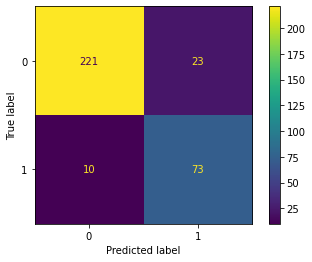

In [142]:
pred00split = r00_split.predict(X_test)
pred00split = list(map(round,pred00split))
print('\nTest accuracy : \n', accuracy_score(y_test, pred00split))
cm00split = confusion_matrix(y_test, pred00split) 
print ('\nConfusion Matrix : \n', cm00split) 
cm00split_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm00split)
cm00split_display.plot()

In [143]:
acc_ols_sp = metrics.accuracy_score(y_test, pred00split)
print('accuracy', acc_ols_sp)

pre_ols_sp = metrics.precision_score(y_test, pred00split, average = None)
print('precision', pre_ols_sp)

senrec_ols_sp = metrics.recall_score(y_test, pred00split, average = None)
print('sensitivity recall', senrec_ols_sp)

f1_ols_sp = metrics.f1_score(y_test, pred00split, average = None)
print('f1 score', f1_ols_sp)

pre_ols_sp_m = np.mean(pre_ols_sp)
senrec_ols_sp_m = np.mean(senrec_ols_sp)
f1_ols_sp_m = np.mean(f1_ols_sp)
print('mean precision', pre_ols_sp_m)
print('mean recall', senrec_ols_sp_m)
print('mean f1 score', f1_ols_sp_m)

accuracy 0.8990825688073395
precision [0.95670996 0.76041667]
sensitivity recall [0.9057377  0.87951807]
f1 score [0.93052632 0.81564246]
mean precision 0.8585633116883117
mean recall 0.8926278886035947
mean f1 score 0.8730843869450162


## Logistic regression

### Without data splitting

In [144]:

# Without constant
# m00_log = sm.Logit(y, x)
# r00_log = m00_log.fit_regularized()
# r00_log.summary()

# Add constant
x_const = tools.add_constant(x)
m00_log = sm.Logit(y,x_const, max_iter = 500)
r00_log = m00_log.fit(method='bfgs')
# r00_log = m00_log.fit()

r00_log.summary()

         Current function value: 0.179618
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


E:\Anaconda\Anaconda_file\lib\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['max_iter']
  warnings.warn(msg, ValueWarning)
E:\Anaconda\Anaconda_file\lib\site-packages\scipy\optimize\_optimize.py:1360: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
E:\Anaconda\Anaconda_file\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
E:\Anaconda\Anaconda_file\lib\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['max_iter']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    acp   No. Observations:                 1087
Model:                          Logit   Df Residuals:                     1026
Method:                           MLE   Df Model:                           60
Date:                Mon, 20 Jan 2025   Pseudo R-squ.:                  0.6928
Time:                        15:10:07   Log-Likelihood:                -195.24
converged:                      False   LL-Null:                       -635.50
Covariance Type:            nonrobust   LLR p-value:                3.552e-146
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.3240      1.125     -1.177      0.239      -3.529       0.881
cp               -0.3763      0.156     -2.417      0.016      -0.681      -0.071
cmin              0.1976      0.713      0.277      0.782      -1.201       1.596
ie               -0.4320      0.342     -1.262      0.207      -1.103       0.239
mew               3.5294      0.565      6.250      0.000       2.423       4.636
meg              -0.0400      0.628     -0.064      0.949      -1.271       1.191
megmax           -0.4075      0.640     -0.637      0.524      -1.662       0.847
dbusl             0.5729      0.405      1.416      0.157      -0.220       1.366
dtraml           -0.4085      0.441     -0.926      0.354      -1.273       0.456
dtrainl           0.3844      0.510      0.753      0.451      -0.616       1.385
dplight          -0.8456      0.615     -1.375      0.169      -2.051       0.360
dstation         -0.8729      0.665     -1.313      0.189      -2.175       0.430
dparkcar          0.0591      0.513      0.115      0.908      -0.946       1.064
dparktw          -0.8349      0.567     -1.472      0.141      -1.947       0.277
dpedcro          -1.5257      0.534     -2.855      0.004      -2.573      -0.478
dstopsign        -0.0563      0.619     -0.091      0.928      -1.270       1.157
dtrafficarea     -0.4375      0.318     -1.374      0.169      -1.062       0.187
droad             2.8322      0.264     10.747      0.000       2.316       3.349
gvm_dwv           0.5480      0.439      1.248      0.212      -0.313       1.409
speedlimit       -1.0083      0.451     -2.238      0.025      -1.891      -0.125
bicyclecount      6.9662      0.848      8.219      0.000       5.305       8.627
carcount          0.2011      0.446      0.450      0.652      -0.674       1.076
z_qnr_1           0.2487      1.252      0.199      0.843      -2.206       2.704
z_qnr_2          -0.3229      1.420     -0.227      0.820      -3.105       2.459
z_qnr_3           0.6010      1.209      0.497      0.619      -1.769       2.971
z_qnr_4           0.5122      0.896      0.572      0.568      -1.244       2.268
z_qnr_6           0.2397      0.733      0.327      0.744      -1.196       1.676
z_qnr_7          -0.8440      1.050     -0.804      0.421      -2.901       1.213
z_qnr_9           0.3941      0.806      0.489      0.625      -1.186       1.974
z_qnr_11         -1.1729      0.845     -1.389      0.165      -2.828       0.482
z_qnr_12          1.5090      0.755      1.999      0.046       0.030       2.988
z_qnr_13          1.6611      0.963      1.725      0.085      -0.226       3.549
z_qnr_14         -0.2098      2.001     -0.105      0.916      -4.131       3.711
z_qnr_17          0.1818      0.945      0.192      0.847      -1.671       2.034
z_qnr_21          0.8702      1.203      0.723      0.469      -1.487       3.227
z_qnr_22         -0.5258      1.301     -0.404      0.686      -3.075       2.024
z_qnr_23         -0.2505      1.053     -0.

In [311]:
print(r00_log.prsquared)
printsigcoef(r00_log)

0.6927690185993924
        feature             0  sig      coef
0            cp  1.564289e-02    * -0.376323
1           mew  4.095005e-10  ***  3.529354
2       dpedcro  4.309136e-03   ** -1.525680
3         droad  6.144808e-27  ***  2.832157
4    speedlimit  2.523647e-02    * -1.008283
5  bicyclecount  2.045785e-16  ***  6.966214
6      z_qnr_12  4.556368e-02    *  1.509011
7      z_knr_10  5.273067e-03   ** -2.182680


,feature,0,sig,coef
0,cp,1.564289e-02,*,-0.376323
1,mew,4.095005e-10,***,3.529354
2,dpedcro,4.309136e-03,**,-1.525680
3,droad,6.144808e-27,***,2.832157
4,speedlimit,2.523647e-02,*,-1.008283
5,bicyclecount,2.045785e-16,***,6.966214
6,z_qnr_12,4.556368e-02,*,1.509011
7,z_knr_10,5.273067e-03,**,-2.182680


0.9153633854645814

Test accuracy : 
 0.9153633854645814

Confusion Matrix : 
 [[740  52]
 [ 40 255]]
accuracy 0.9153633854645814
precision [0.94871795 0.83061889]
sensitivity recall [0.93434343 0.86440678]
f1 score [0.94147583 0.84717608]
mean precision 0.8896684206130461
mean recall 0.8993751070022257
mean f1 score 0.8943259533531147


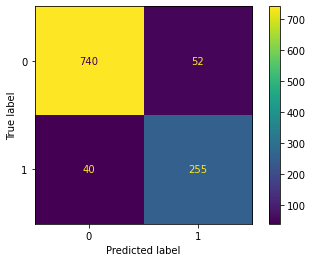

In [146]:
pred00log = r00_log.predict(x_const)
pred00log = list(map(round,pred00log))
print(accuracy_score(y, pred00log))
print('\nTest accuracy : \n', accuracy_score(y, pred00log))
cm00log = confusion_matrix(y, pred00log) 
print ('\nConfusion Matrix : \n', cm00log)
cm00log_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm00log)
cm00log_display.plot()

acc_log = metrics.accuracy_score(y, pred00log)
print('accuracy', acc_log)

pre_log = metrics.precision_score(y, pred00log, average = None)
print('precision', pre_log)

senrec_log = metrics.recall_score(y, pred00log, average = None)
print('sensitivity recall', senrec_log)

f1_log = metrics.f1_score(y, pred00log, average = None)
print('f1 score', f1_log)

pre_log_m = np.mean(pre_log)
senrec_log_m = np.mean(senrec_log)
f1_log_m = np.mean(f1_log)
print('mean precision', pre_log_m)
print('mean recall', senrec_log_m)
print('mean f1 score', f1_log_m)

### With data splitting

In [147]:

X_train1, X_test1, y_train1, y_test1 = train_test_split(
        x_const, y,
        test_size=0.25,
        random_state=7)
m00_log_split = sm.Logit(y_train1,X_train1, max_iter = 10000)
r00_log_split = m00_log_split.fit(method='bfgs')
r00_log_split.summary()

         Current function value: 0.179164
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


E:\Anaconda\Anaconda_file\lib\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['max_iter']
  warnings.warn(msg, ValueWarning)
E:\Anaconda\Anaconda_file\lib\site-packages\scipy\optimize\_optimize.py:1360: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
E:\Anaconda\Anaconda_file\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
E:\Anaconda\Anaconda_file\lib\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['max_iter']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    acp   No. Observations:                  815
Model:                          Logit   Df Residuals:                      754
Method:                           MLE   Df Model:                           60
Date:                Mon, 20 Jan 2025   Pseudo R-squ.:                  0.6947
Time:                        15:10:07   Log-Likelihood:                -146.02
converged:                      False   LL-Null:                       -478.26
Covariance Type:            nonrobust   LLR p-value:                8.383e-103
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.0248      1.578     -0.649      0.516      -4.118       2.068
cp               -0.5411      0.195     -2.771      0.006      -0.924      -0.158
cmin              0.7933      1.154      0.688      0.492      -1.468       3.054
ie               -0.8007      0.414     -1.936      0.053      -1.611       0.010
mew               3.6324      0.669      5.430      0.000       2.321       4.944
meg              -0.2238      0.756     -0.296      0.767      -1.706       1.258
megmax           -0.1855      0.760     -0.244      0.807      -1.675       1.304
dbusl             0.8783      0.477      1.841      0.066      -0.057       1.813
dtraml           -0.3246      0.514     -0.631      0.528      -1.332       0.683
dtrainl           0.6039      0.620      0.974      0.330      -0.611       1.819
dplight          -1.1531      0.783     -1.473      0.141      -2.688       0.382
dstation         -1.4212      0.831     -1.711      0.087      -3.049       0.207
dparkcar          0.1981      0.608      0.326      0.745      -0.994       1.390
dparktw          -0.6935      0.660     -1.052      0.293      -1.986       0.599
dpedcro          -1.6546      0.644     -2.569      0.010      -2.917      -0.392
dstopsign        -0.2651      0.742     -0.357      0.721      -1.719       1.188
dtrafficarea     -0.5623      0.399     -1.408      0.159      -1.345       0.220
droad             2.8781      0.320      8.984      0.000       2.250       3.506
gvm_dwv           0.5520      0.515      1.071      0.284      -0.458       1.562
speedlimit       -1.0916      0.534     -2.044      0.041      -2.138      -0.045
bicyclecount      6.9914      1.017      6.874      0.000       4.998       8.985
carcount         -0.0080      0.546     -0.015      0.988      -1.078       1.062
z_qnr_1           0.5644      1.799      0.314      0.754      -2.961       4.090
z_qnr_2          -0.2837      1.701     -0.167      0.867      -3.617       3.049
z_qnr_3           0.2411      1.497      0.161      0.872      -2.693       3.176
z_qnr_4           0.1504      1.080      0.139      0.889      -1.966       2.267
z_qnr_6           0.6948      0.889      0.781      0.435      -1.048       2.438
z_qnr_7          -1.0258      1.193     -0.860      0.390      -3.363       1.312
z_qnr_9           0.0868      0.887      0.098      0.922      -1.652       1.826
z_qnr_11         -1.0822      0.928     -1.166      0.244      -2.901       0.737
z_qnr_12          0.7351      0.900      0.817      0.414      -1.029       2.500
z_qnr_13          1.5056      1.182      1.273      0.203      -0.812       3.823
z_qnr_14         -0.0559      2.239     -0.025      0.980      -4.445       4.333
z_qnr_17          0.0593      1.283      0.046      0.963      -2.456       2.575
z_qnr_21          0.4940      1.372      0.360      0.719      -2.195       3.183
z_qnr_22         -0.4955      1.614     -0.307      0.759      -3.658       2.667
z_qnr_23         -0.2752      1.214     -0.

In [312]:
print(r00_log_split.prsquared)
printsigcoef(r00_log_split)

0.6946895006341105
        feature             0  sig      coef
0            cp  5.594369e-03   ** -0.541098
1           mew  5.627557e-08  ***  3.632450
2       dpedcro  1.019935e-02    * -1.654632
3         droad  2.604465e-19  ***  2.878131
4    speedlimit  4.095362e-02    * -1.091626
5  bicyclecount  6.240357e-12  ***  6.991378
6      z_knr_10  3.447316e-02    * -1.967967
7     r_width_1  3.336867e-02    *  1.311871


,feature,0,sig,coef
0,cp,5.594369e-03,**,-0.541098
1,mew,5.627557e-08,***,3.632450
2,dpedcro,1.019935e-02,*,-1.654632
3,droad,2.604465e-19,***,2.878131
4,speedlimit,4.095362e-02,*,-1.091626
5,bicyclecount,6.240357e-12,***,6.991378
6,z_knr_10,3.447316e-02,*,-1.967967
7,r_width_1,3.336867e-02,*,1.311871


0.8933823529411765

Test accuracy : 
 0.8933823529411765

Confusion Matrix : 
 [[186  14]
 [ 15  57]]
accuracy 0.8933823529411765
precision [0.92537313 0.8028169 ]
sensitivity recall [0.93       0.79166667]
f1 score [0.9276808 0.7972028]
mean precision 0.8640950178684045
mean recall 0.8608333333333333
mean f1 score 0.8624417976038923


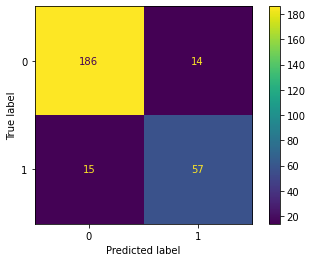

In [149]:
pred00log_split = r00_log_split.predict(X_test1)
pred00log_split = list(map(round,pred00log_split))
print(accuracy_score(y_test1, pred00log_split))
print('\nTest accuracy : \n', accuracy_score(y_test1, pred00log_split))
cm00log_split = confusion_matrix(y_test1, pred00log_split) 
print ('\nConfusion Matrix : \n', cm00log_split)
cm00log_split_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm00log_split)
cm00log_split_display.plot()

acc_log_split = metrics.accuracy_score(y_test1, pred00log_split)
print('accuracy', acc_log_split)

pre_log_split = metrics.precision_score(y_test1, pred00log_split, average = None)
print('precision', pre_log_split)

senrec_log_split = metrics.recall_score(y_test1, pred00log_split, average = None)
print('sensitivity recall', senrec_log_split)

f1_log_split = metrics.f1_score(y_test1, pred00log_split, average = None)
print('f1 score', f1_log_split)

pre_log_split_m = np.mean(pre_log_split)
senrec_log_split_m = np.mean(senrec_log_split)
f1_log_split_m = np.mean(f1_log_split)
print('mean precision', pre_log_split_m)
print('mean recall', senrec_log_split_m)
print('mean f1 score', f1_log_split_m)

# Step wise feature selection

In [150]:
# Check sklearn metrics name for feature selection
# sklearn.metrics.get_scorer_names()

## Ordinary Least Squares Regression model

### Sequential forward floating selection

In [151]:
# def fs_output_sum(type, cv_start, cv_end, cv_step, x, y):
#     pa1 = ['neg_mean_squared_error', 
#            'r2',
#            'neg_median_absolute_error',
#            'neg_mean_absolute_error']
#     pa2 = ['accuracy',
#            'f1',
#            'precision',
#            'recall']
#     if type == 'linear':
#         sel_cols_f = pd.DataFrame()
#         sel_cols_b = pd.DataFrame()
#         for p in range(0,3):
#             for i in range(cv_start, cv_end, cv_step):
#                 sffslin = featureselection_lin(True, pa1[p], i, x, y)
#                 sbfslin = featureselection_lin(False, pa1[p], i, x, y)
#                 sel_cols_f[pa1[p]] = list(sffslin.k_feature_names_)
#                 sel_cols_b[pa1[p]] = list(sbfslin.k_feature_names_)
#     elif type == 'logistic':
#         sel_cols_f = pd.DataFrame()
#         sel_cols_b = pd.DataFrame()
#         for q in range(0,3):
#             for t in range(cv_start, cv_end, cv_step):
#                 sffslog = featureselection_log(True, pa2[q], t, x, y)
#                 sbfslog = featureselection_log(False, pa2[q], t, x, y)
#                 sel_cols_f[pa2[q]] = list(sffslog.k_feature_names_)
#                 sel_cols_b[pa2[q]] = list(sbfslog.k_feature_names_)
#     else:
#         print('Error, invalid input!')
#     return sel_cols_f, sel_cols_b


In [152]:
# # n = best, linear regression, scoring = neg_mean_squared_error, cv = 5
sffslin0 = featureselection_lin(True, 'neg_mean_squared_error', 5, x, y) 
print(sffslin0.k_feature_names_)
print(len(sffslin0.k_feature_names_))
print(sffslin0.k_score_)


('cp', 'mew', 'dtraml', 'dtrainl', 'dstation', 'dparkcar', 'dpedcro', 'dtrafficarea', 'droad', 'speedlimit', 'bicyclecount', 'z_qnr_11', 'z_qnr_13', 'z_qnr_14', 'z_qnr_32', 'z_qnr_33', 'z_knr_2', 'z_knr_10', 'trafficarea_2', 'speedlimit_2')
20
-0.15689942143068442


In [153]:
# # # n = best, linear regression, scoring = neg_mean_squared_error, cv = 10
# sffslin1 = featureselection_lin(True, 'neg_mean_squared_error', 10, x, y) 
# print(sffslin1.k_feature_names_)
# print(len(sffslin1.k_feature_names_))
# print(sffslin1.k_score_)


In [154]:
# # n = best, linear regression, scoring = r2, cv = 5
sffslin2 = featureselection_lin(True, 'r2', 5, x, y) 
print(sffslin2.k_feature_names_)
print(len(sffslin2.k_feature_names_))
print(sffslin2.k_score_)

('cmin', 'ie', 'mew', 'megmax', 'dbusl', 'dtraml', 'dparkcar', 'dparktw', 'dpedcro', 'dtrafficarea', 'droad', 'speedlimit', 'bicyclecount', 'z_qnr_1', 'z_qnr_4', 'z_qnr_6', 'z_qnr_9', 'z_qnr_11', 'z_qnr_12', 'z_qnr_13', 'z_qnr_17', 'z_qnr_21', 'z_qnr_23', 'z_qnr_24', 'z_qnr_28', 'z_qnr_32', 'z_knr_3', 'z_knr_7', 'trafficarea_1', 'trafficarea_2', 'r_width_1', 'r_width_6', 'speedlimit_2')
33
0.12423031660044545


In [155]:
# # n = best, linear regression, scoring = r2, cv = 10
# sffslin3 = featureselection_lin(True, 'r2', 10, x, y) 
# print(sffslin3.k_feature_names_)
# print(len(sffslin3.k_feature_names_))
# print(sffslin3.k_score_)

In [156]:
# # # n = best, linear regression, scoring = neg median absolute error, cv = 5
sffslin4 = featureselection_lin(True, 'neg_median_absolute_error', 5, x, y) 
print(sffslin4.k_feature_names_)
print(len(sffslin4.k_feature_names_))
print(sffslin4.k_score_)

('cmin', 'droad', 'z_qnr_6', 'z_qnr_12', 'trafficarea_1', 'r_width_3', 'speedlimit_6')
7
-0.18883018837512483


In [157]:
# # # # n = best, linear regression, scoring = neg median absolute error, cv = 10
# sffslin5 = featureselection_lin(True, 'neg_median_absolute_error', 10, x, y) 
# print(sffslin5.k_feature_names_)
# print(len(sffslin5.k_feature_names_))
# print(sffslin5.k_score_)

In [158]:
# # # n = best, linear regression, scoring = neg mean absolute error, cv = 5
sffslin6 = featureselection_lin(True, 'neg_mean_absolute_error', 5, x, y) 
print(sffslin6.k_feature_names_)
print(len(sffslin6.k_feature_names_))
print(sffslin6.k_score_)

('cp', 'mew', 'dtraml', 'dtrainl', 'dstation', 'dparkcar', 'dstopsign', 'dtrafficarea', 'droad', 'bicyclecount', 'z_qnr_1', 'z_qnr_6', 'z_qnr_11', 'z_qnr_13', 'z_qnr_14', 'z_qnr_17', 'z_knr_10', 'trafficarea_2', 'r_width_1', 'speedlimit_2', 'speedlimit_5', 'speedlimit_6')
22
-0.3175896853490701


In [159]:
# # # # n = best, linear regression, scoring = neg mean absolute error, cv = 10
# sffslin7 = featureselection_lin(True, 'neg_mean_absolute_error', 10, x, y) 
# print(sffslin7.k_feature_names_)
# print(len(sffslin7.k_feature_names_))
# print(sffslin7.k_score_)

In [161]:
selected_columns_linr_sffs = []
selected_columns_linr_sffs = {'nmse_cv5':list(sffslin0.k_feature_names_), 
#                               'nmse_cv10':list(sffslin1.k_feature_names_), 
                              'r2_cv5':list(sffslin2.k_feature_names_), 
#                               'r2_cv10':list(sffslin3.k_feature_names_), 
                              'nmedae_cv5':list(sffslin4.k_feature_names_), 
#                               'nmedae_cv10':list(sffslin5.k_feature_names_), 
                              'nmeae_cv5':list(sffslin6.k_feature_names_) 
#                               'nmeae_cv10':list(sffslin7.k_feature_names_)
                             }

In [162]:
df_sf_linr_sffs = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in selected_columns_linr_sffs.items()]))

In [163]:
# df_sf_linr_sffs.to_csv('/home/yelhe/script/mtp/tables/updated_sffs_linearreg.csv', index = True)

In [317]:
lin_sffs = []

In [332]:
# 0 2 4 6
selected_columns = list(sffslin6.k_feature_names_)
selected_columns

['cp',
 'mew',
 'dtraml',
 'dtrainl',
 'dstation',
 'dparkcar',
 'dstopsign',
 'dtrafficarea',
 'droad',
 'bicyclecount',
 'z_qnr_1',
 'z_qnr_6',
 'z_qnr_11',
 'z_qnr_13',
 'z_qnr_14',
 'z_qnr_17',
 'z_knr_10',
 'trafficarea_2',
 'r_width_1',
 'speedlimit_2',
 'speedlimit_5',
 'speedlimit_6']

In [333]:
# OLS
xs = dfacrpv[selected_columns]
x_const_s = tools.add_constant(xs)
X_train, X_test, y_train, y_test = train_test_split(
        x_const_s, y,
        test_size=0.4,
        random_state=3)

m0 = sm.OLS(y_train, X_train)
r0 = m0.fit()
r0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    acp   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     34.67
Date:                Mon, 20 Jan 2025   Prob (F-statistic):           2.63e-93
Time:                        16:34:09   Log-Likelihood:                -125.76
No. Observations:                 652   AIC:                             297.5
Df Residuals:                     629   BIC:                             400.6
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4380      0.045      9.628      0.000       0.349       0.527
cp               -0.0350      0.012     -2.807      0.005      -0.059      -0.011
mew               0.2780      0.042      6.577      0.000       0.195       0.361
dtraml           -0.0884      0.028     -3.187      0.002      -0.143      -0.034
dtrainl          -0.0669      0.036     -1.862      0.063      -0.137       0.004
dstation         -0.1103      0.047     -2.335      0.020      -0.203      -0.018
dparkcar          0.0650      0.036      1.802      0.072      -0.006       0.136
dstopsign         0.0760      0.041      1.863      0.063      -0.004       0.156
dtrafficarea     -0.0458      0.022     -2.088      0.037      -0.089      -0.003
droad             0.2512      0.018     13.687      0.000       0.215       0.287
bicyclecount      0.2634      0.023     11.219      0.000       0.217       0.309
z_qnr_1           0.1416      0.085      1.669      0.096      -0.025       0.308
z_qnr_6           0.2252      0.062      3.631      0.000       0.103       0.347
z_qnr_11         -0.2000      0.080     -2.488      0.013      -0.358      -0.042
z_qnr_13          0.2637      0.080      3.316      0.001       0.108       0.420
z_qnr_14         -0.1488      0.115     -1.293      0.197      -0.375       0.077
z_qnr_17          0.0740      0.051      1.452      0.147      -0.026       0.174
z_knr_10         -0.1505      0.045     -3.331      0.001      -0.239      -0.062
trafficarea_2    -0.0782      0.045     -1.733      0.084      -0.167       0.010
r_width_1        -0.0240      0.044     -0.540      0.589      -0.111       0.063
speedlimit_2     -0.0825      0.086     -0.962      0.336      -0.251       0.086
speedlimit_5     -0.0329      0.106     -0.311      0.756      -0.241       0.175
speedlimit_6     -0.0886      0.147     -0.605      0.546      -0.377       0.199
==============================================================================
Omnibus:                        0.098   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.952   Jarque-Bera (JB):                0.076
Skew:                          -0.027   Prob(JB):                        0.963
Kurtosis:                       3.001   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [334]:
lin_sffs.append(r0.rsquared_adj)

In [335]:
lin_sffs

[0.5301587542402446,
 0.5391296879635421,
 0.3566254563007396,
 0.5322317953757842]

In [336]:
printsigcoef(r0)

         feature             0  sig      coef
0          const  1.465024e-20  ***  0.438050
1             cp  5.150481e-03   ** -0.034952
2            mew  1.010659e-10  ***  0.277993
3         dtraml  1.510815e-03   ** -0.088366
4       dstation  1.987754e-02    * -0.110281
5   dtrafficarea  3.720523e-02    * -0.045809
6          droad  1.638810e-37  ***  0.251185
7   bicyclecount  9.421890e-27  ***  0.263355
8        z_qnr_6  3.057846e-04  ***  0.225180
9       z_qnr_11  1.309003e-02    * -0.200030
10      z_qnr_13  9.647973e-04  ***  0.263712
11      z_knr_10  9.166130e-04  *** -0.150509


,feature,0,sig,coef
0,const,1.465024e-20,***,0.438050
1,cp,5.150481e-03,**,-0.034952
2,mew,1.010659e-10,***,0.277993
3,dtraml,1.510815e-03,**,-0.088366
4,dstation,1.987754e-02,*,-0.110281
5,dtrafficarea,3.720523e-02,*,-0.045809
6,droad,1.638810e-37,***,0.251185
7,bicyclecount,9.421890e-27,***,0.263355
8,z_qnr_6,3.057846e-04,***,0.225180
9,z_qnr_11,1.309003e-02,*,-0.200030


### Sequential backward floating selection

In [185]:
# # n = best, linear regression, backward, scoring = neg_mean_squared_error, cv = 5
sbfslin0 = featureselection_lin(False, 'neg_mean_squared_error', 5, x, y) 
print(sbfslin0.k_feature_names_)
print(len(sbfslin0.k_feature_names_))
print(sbfslin0.k_score_)

('cp', 'mew', 'dtraml', 'dtrainl', 'dstation', 'dparkcar', 'dpedcro', 'dtrafficarea', 'droad', 'speedlimit', 'bicyclecount', 'z_qnr_11', 'z_qnr_13', 'z_qnr_14', 'z_qnr_32', 'z_qnr_33', 'z_knr_2', 'z_knr_10', 'trafficarea_2', 'speedlimit_2')
20
-0.15689942143068442


In [186]:
# # # n = best, linear regression, backward, scoring = neg_mean_squared_error, cv = 10
# sbfslin1 = featureselection_lin(False, 'neg_mean_squared_error', 10, x, y) 
# print(sbfslin1.k_feature_names_)
# print(len(sbfslin1.k_feature_names_))
# print(sbfslin1.k_score_)


In [187]:
# # n = best, linear regression, backward, scoring = r2, cv = 5
sbfslin2 = featureselection_lin(False, 'r2', 5, x, y) 
print(sbfslin2.k_feature_names_)
print(len(sbfslin2.k_feature_names_))
print(sbfslin2.k_score_)

('cmin', 'ie', 'mew', 'megmax', 'dbusl', 'dtraml', 'dparkcar', 'dparktw', 'dpedcro', 'dtrafficarea', 'droad', 'speedlimit', 'bicyclecount', 'z_qnr_1', 'z_qnr_4', 'z_qnr_6', 'z_qnr_9', 'z_qnr_11', 'z_qnr_12', 'z_qnr_13', 'z_qnr_17', 'z_qnr_21', 'z_qnr_23', 'z_qnr_24', 'z_qnr_28', 'z_qnr_32', 'z_knr_3', 'z_knr_7', 'trafficarea_1', 'trafficarea_2', 'r_width_1', 'r_width_6', 'speedlimit_2')
33
0.12423031660044545


In [188]:
# # # n = best, linear regression, backward, scoring = r2, cv = 10
# sbfslin3 = featureselection_lin(False, 'r2', 10, x, y) 
# print(sbfslin3.k_feature_names_)
# print(len(sbfslin3.k_feature_names_))
# print(sbfslin3.k_score_)

In [189]:
# # n = best, linear regression, backward, scoring = neg median aboslute error, cv = 5
sbfslin4 = featureselection_lin(False, 'neg_median_absolute_error', 5, x, y) 
print(sbfslin4.k_feature_names_)
print(len(sbfslin4.k_feature_names_))
print(sbfslin4.k_score_)

('droad', 'gvm_dwv', 'z_qnr_4', 'z_qnr_6', 'z_qnr_9', 'z_qnr_13', 'z_qnr_25', 'trafficarea_1', 'trafficarea_2', 'speedlimit_6')
10
-0.18880865864262572


In [190]:
# # # n = best, linear regression, backward, scoring = neg median aboslute error, cv = 10
# sbfslin5 = featureselection_lin(False, 'neg_median_absolute_error', 10, x, y) 
# print(sbfslin5.k_feature_names_)
# print(len(sbfslin5.k_feature_names_))
# print(sbfslin5.k_score_)

In [191]:
# # n = best, linear regression, backward, scoring = neg mean absolute error, cv = 5
sbfslin6 = featureselection_lin(False, 'neg_mean_absolute_error', 5, x, y) 
print(sbfslin6.k_feature_names_)
print(len(sbfslin6.k_feature_names_))
print(sbfslin6.k_score_)

('cp', 'mew', 'dtraml', 'dtrainl', 'dstation', 'dparkcar', 'dstopsign', 'dtrafficarea', 'droad', 'bicyclecount', 'z_qnr_1', 'z_qnr_6', 'z_qnr_11', 'z_qnr_13', 'z_qnr_14', 'z_qnr_17', 'z_knr_10', 'trafficarea_2', 'r_width_1', 'speedlimit_2', 'speedlimit_5', 'speedlimit_6')
22
-0.3175896853490701


In [192]:
# # # n = best, linear regression, backward, scoring = neg mean aboslute error, cv = 10
# sbfslin7 = featureselection_lin(False, 'neg_mean_absolute_error', 10, x, y) 
# print(sbfslin7.k_feature_names_)
# print(len(sbfslin7.k_feature_names_))
# print(sbfslin7.k_score_)

In [193]:
selected_columns_linr_sbfs = []
selected_columns_linr_sbfs = {'nmse_cv5':list(sbfslin0.k_feature_names_), 
#                               'nmse_cv10':list(sbfslin1.k_feature_names_), 
                              'r2_cv5':list(sbfslin2.k_feature_names_), 
#                               'r2_cv10':list(sbfslin3.k_feature_names_), 
                              'nmedae_cv5':list(sbfslin4.k_feature_names_), 
#                               'nmedae_cv10':list(sbfslin5.k_feature_names_),
                              'nmeae_cv5':list(sbfslin6.k_feature_names_)
#                               , 'nmeae_cv10':list(sbfslin7.k_feature_names_)
                             }

In [194]:
df_sf_linr_sbfs = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in selected_columns_linr_sbfs.items()]))

In [195]:
# df_sf_linr_sbfs.to_csv('/home/yelhe/script/mtp/tables/updated_sbfs_linearreg.csv', index = True)

In [ ]:
# df_output = pd.read_csv('/home/yelhe/script/mtp/tables/updated_sbfs_linearreg.csv')

In [337]:
lin_sbfs = []

In [354]:
# 0 2 4 6
selected_columns = list(sbfslin6.k_feature_names_)
selected_columns

['cp',
 'mew',
 'dtraml',
 'dtrainl',
 'dstation',
 'dparkcar',
 'dstopsign',
 'dtrafficarea',
 'droad',
 'bicyclecount',
 'z_qnr_1',
 'z_qnr_6',
 'z_qnr_11',
 'z_qnr_13',
 'z_qnr_14',
 'z_qnr_17',
 'z_knr_10',
 'trafficarea_2',
 'r_width_1',
 'speedlimit_2',
 'speedlimit_5',
 'speedlimit_6']

In [355]:
# OLS
xs = dfacrpv[selected_columns]
x_const_s = tools.add_constant(xs)
X_train, X_test, y_train, y_test = train_test_split(
        x_const_s, y,
        test_size=0.4,
        random_state=3)

m1 = sm.OLS(y_train, X_train)
r1 = m1.fit()
r1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    acp   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     34.67
Date:                Mon, 20 Jan 2025   Prob (F-statistic):           2.63e-93
Time:                        16:37:42   Log-Likelihood:                -125.76
No. Observations:                 652   AIC:                             297.5
Df Residuals:                     629   BIC:                             400.6
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4380      0.045      9.628      0.000       0.349       0.527
cp               -0.0350      0.012     -2.807      0.005      -0.059      -0.011
mew               0.2780      0.042      6.577      0.000       0.195       0.361
dtraml           -0.0884      0.028     -3.187      0.002      -0.143      -0.034
dtrainl          -0.0669      0.036     -1.862      0.063      -0.137       0.004
dstation         -0.1103      0.047     -2.335      0.020      -0.203      -0.018
dparkcar          0.0650      0.036      1.802      0.072      -0.006       0.136
dstopsign         0.0760      0.041      1.863      0.063      -0.004       0.156
dtrafficarea     -0.0458      0.022     -2.088      0.037      -0.089      -0.003
droad             0.2512      0.018     13.687      0.000       0.215       0.287
bicyclecount      0.2634      0.023     11.219      0.000       0.217       0.309
z_qnr_1           0.1416      0.085      1.669      0.096      -0.025       0.308
z_qnr_6           0.2252      0.062      3.631      0.000       0.103       0.347
z_qnr_11         -0.2000      0.080     -2.488      0.013      -0.358      -0.042
z_qnr_13          0.2637      0.080      3.316      0.001       0.108       0.420
z_qnr_14         -0.1488      0.115     -1.293      0.197      -0.375       0.077
z_qnr_17          0.0740      0.051      1.452      0.147      -0.026       0.174
z_knr_10         -0.1505      0.045     -3.331      0.001      -0.239      -0.062
trafficarea_2    -0.0782      0.045     -1.733      0.084      -0.167       0.010
r_width_1        -0.0240      0.044     -0.540      0.589      -0.111       0.063
speedlimit_2     -0.0825      0.086     -0.962      0.336      -0.251       0.086
speedlimit_5     -0.0329      0.106     -0.311      0.756      -0.241       0.175
speedlimit_6     -0.0886      0.147     -0.605      0.546      -0.377       0.199
==============================================================================
Omnibus:                        0.098   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.952   Jarque-Bera (JB):                0.076
Skew:                          -0.027   Prob(JB):                        0.963
Kurtosis:                       3.001   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [356]:
lin_sbfs.append(r1.rsquared_adj)
lin_sbfs

[0.5301587542402446,
 0.5391296879635421,
 0.35918647559977834,
 0.5322317953757842]

In [357]:
printsigcoef(r1)

         feature             0  sig      coef
0          const  1.465024e-20  ***  0.438050
1             cp  5.150481e-03   ** -0.034952
2            mew  1.010659e-10  ***  0.277993
3         dtraml  1.510815e-03   ** -0.088366
4       dstation  1.987754e-02    * -0.110281
5   dtrafficarea  3.720523e-02    * -0.045809
6          droad  1.638810e-37  ***  0.251185
7   bicyclecount  9.421890e-27  ***  0.263355
8        z_qnr_6  3.057846e-04  ***  0.225180
9       z_qnr_11  1.309003e-02    * -0.200030
10      z_qnr_13  9.647973e-04  ***  0.263712
11      z_knr_10  9.166130e-04  *** -0.150509


,feature,0,sig,coef
0,const,1.465024e-20,***,0.438050
1,cp,5.150481e-03,**,-0.034952
2,mew,1.010659e-10,***,0.277993
3,dtraml,1.510815e-03,**,-0.088366
4,dstation,1.987754e-02,*,-0.110281
5,dtrafficarea,3.720523e-02,*,-0.045809
6,droad,1.638810e-37,***,0.251185
7,bicyclecount,9.421890e-27,***,0.263355
8,z_qnr_6,3.057846e-04,***,0.225180
9,z_qnr_11,1.309003e-02,*,-0.200030


## Logistic Regression model

### Sequential forward floating selection

In [213]:
# # n = best, logistic regression, scoring = accuracy, cv = 5
sffslog0 = featureselection_log(True, 'accuracy', 5, x, y)
print(sffslog0.k_feature_names_)
print(len(sffslog0.k_feature_names_))
print(sffslog0.k_score_)

('mew', 'dstation', 'dparkcar', 'dtrafficarea', 'droad', 'bicyclecount', 'z_qnr_4', 'z_qnr_7', 'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_21', 'z_qnr_22', 'z_qnr_24', 'z_qnr_25', 'z_qnr_33', 'z_knr_3', 'z_knr_9', 'z_knr_10', 'trafficarea_2', 'r_width_3', 'r_width_5', 'r_width_6')
23
0.910751278907538


In [214]:
# # n = best, logistic regression, scoring = accuracy, cv = 10
# sffslog1 = featureselection_log(True, 'accuracy', 10, x, y)
# print(sffslog1.k_feature_names_)
# print(len(sffslog1.k_feature_names_))
# print(sffslog1.k_score_)


In [215]:
# # n = best, logistic regression, scoring = f1, cv = 5
sffslog2 = featureselection_log(True, 'f1', 5, x, y)
print(sffslog2.k_feature_names_)
print(len(sffslog2.k_feature_names_))
print(sffslog2.k_score_)

('cp', 'cmin', 'mew', 'meg', 'megmax', 'dtraml', 'dplight', 'dstation', 'dparkcar', 'dparktw', 'dpedcro', 'droad', 'speedlimit', 'bicyclecount', 'carcount', 'z_qnr_3', 'z_qnr_4', 'z_qnr_11', 'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_22', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_28', 'z_qnr_32', 'z_qnr_33', 'z_knr_3', 'z_knr_9', 'z_knr_10', 'trafficarea_1', 'r_width_1', 'r_width_5', 'speedlimit_5', 'speedlimit_6')
36
0.8511642143304938


In [216]:
# # # n = best, logistic regression, scoring = f1, cv = 10
# sffslog3 = featureselection_log(True, 'f1', 10, x, y)
# print(sffslog3.k_feature_names_)
# print(len(sffslog3.k_feature_names_))
# print(sffslog3.k_score_)


In [217]:
# n = best, logistic regression, scoring = precision, cv = 5
sffslog4 = featureselection_log(True, 'precision', 5, x, y)
print(sffslog4.k_feature_names_)
print(len(sffslog4.k_feature_names_))
print(sffslog4.k_score_)


('carcount', 'z_qnr_6')
2
0.8454545454545455


In [218]:
# # # # n = best, logistic regression, scoring = precision, cv = 10
# sffslog5 = featureselection_log(True, 'precision', 10, x, y)
# print(sffslog5.k_feature_names_)
# print(len(sffslog5.k_feature_names_))
# print(sffslog5.k_score_)

In [219]:
# # n = best, logistic regression, scoring = recall, cv = 5
sffslog6 = featureselection_log(True, 'recall', 5, x, y)
print(sffslog6.k_feature_names_)
print(len(sffslog6.k_feature_names_))
print(sffslog6.k_score_)


('cmin', 'mew', 'dstation', 'dparkcar', 'droad', 'gvm_dwv', 'speedlimit', 'bicyclecount', 'carcount', 'z_qnr_3', 'z_qnr_4', 'z_qnr_7', 'z_qnr_9', 'z_qnr_14', 'z_qnr_22', 'z_qnr_25', 'z_qnr_28', 'z_qnr_33', 'z_knr_7', 'z_knr_10', 'trafficarea_2')
21
0.8711864406779661


In [220]:
# # # n = best, logistic regression, scoring = recall, cv = 10
# sffslog7 = featureselection_log(True, 'recall', 10, x, y)
# print(sffslog7.k_feature_names_)
# print(len(sffslog7.k_feature_names_))
# print(sffslog7.k_score_)


In [221]:
# For part 
selected_columns_logr_sffs = []
selected_columns_logr_sffs = {
                              'acc_cv5':list(sffslog0.k_feature_names_), 
#                               'acc_cv10':list(sffslog1.k_feature_names_), 
                              'f1_cv5':list(sffslog2.k_feature_names_), 
#                               'f1_cv10':list(sffslog3.k_feature_names_), 
                              'pre_cv5':list(sffslog4.k_feature_names_), 
#                               'pre_cv10':list(sffslog5.k_feature_names_),
                              'rec_cv5':list(sffslog6.k_feature_names_)
#     ,                           'rec_cv10':list(sffslog7.k_feature_names_)
                              }
df_sf_logr_sffs = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in selected_columns_logr_sffs.items()]))
# df_sf_logr_sffs.to_csv('/home/yelhe/script/mtp/tables/vif_sffs_logisticreg.csv', index = True)

### Sequential backward floating selection

In [222]:
# n = best, logistic regression, scoring = accuracy, cv = 5
sbfslog0 = featureselection_log(False, 'accuracy', 5, x, y)
print(sbfslog0.k_feature_names_)
print(len(sbfslog0.k_feature_names_))
print(sbfslog0.k_score_)


('cp', 'ie', 'mew', 'dtraml', 'dplight', 'dstation', 'dparkcar', 'dparktw', 'dpedcro', 'droad', 'gvm_dwv', 'speedlimit', 'bicyclecount', 'z_qnr_4', 'z_qnr_11', 'z_qnr_13', 'z_qnr_22', 'z_qnr_24', 'z_qnr_25', 'z_knr_3', 'z_knr_10', 'trafficarea_1', 'r_width_1', 'r_width_3')
24
0.9199425020082019


In [223]:
# # n = best, logistic regression, scoring = accuracy, cv = 10
# sbfslog1 = featureselection_log(False, 'accuracy', 10, x, y)
# print(sbfslog1.k_feature_names_)
# print(len(sbfslog1.k_feature_names_))
# print(sbfslog1.k_score_)


In [224]:
# n = best, logistic regression, scoring = f1, cv = 5
sbfslog2 = featureselection_log(False, 'f1', 5, x, y)
print(sbfslog2.k_feature_names_)
print(len(sbfslog2.k_feature_names_))
print(sbfslog2.k_score_)

('cp', 'ie', 'mew', 'meg', 'megmax', 'dtraml', 'dparkcar', 'dparktw', 'dpedcro', 'droad', 'speedlimit', 'bicyclecount', 'z_qnr_4', 'z_qnr_7', 'z_qnr_11', 'z_qnr_12', 'z_qnr_13', 'z_qnr_21', 'z_qnr_25', 'z_knr_3', 'z_knr_9', 'z_knr_10', 'trafficarea_1', 'trafficarea_2', 'r_width_1', 'r_width_3')
26
0.8509500243920523


In [225]:
# # n = best, logistic regression, scoring = f1, cv = 10
# sbfslog3 = featureselection_log(False, 'f1', 10, x, y)
# print(sbfslog3.k_feature_names_)
# print(len(sbfslog3.k_feature_names_))
# print(sbfslog3.k_score_)

In [226]:
# n = best, logistic regression, scoring = precision, cv = 5
sbfslog4 = featureselection_log(False, 'precision', 5, x, y)
print(sbfslog4.k_feature_names_)
print(len(sbfslog4.k_feature_names_))
print(sbfslog4.k_score_)


('cp', 'ie', 'mew', 'dstation', 'dparktw', 'dpedcro', 'droad', 'gvm_dwv', 'speedlimit', 'bicyclecount', 'z_qnr_11', 'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_25', 'z_knr_10', 'trafficarea_1', 'r_width_1')
18
0.8417471264367815


In [227]:
# # n = best, logistic regression, scoring = precision, cv = 10
# sbfslog5 = featureselection_log(False, 'precision', 10, x, y)
# print(sbfslog5.k_feature_names_)
# print(len(sbfslog5.k_feature_names_))
# print(sbfslog5.k_score_)


In [228]:
# n = best, logistic regression, scoring = recall, cv = 5
sbfslog6 = featureselection_log(False, 'recall', 5, x, y)
print(sbfslog6.k_feature_names_)
print(len(sbfslog6.k_feature_names_))
print(sbfslog6.k_score_)

('cp', 'ie', 'mew', 'megmax', 'dtraml', 'dstation', 'dparkcar', 'dparktw', 'dpedcro', 'dtrafficarea', 'droad', 'gvm_dwv', 'speedlimit', 'bicyclecount', 'carcount', 'z_qnr_11', 'z_qnr_13', 'z_knr_3', 'z_knr_7', 'trafficarea_1', 'r_width_1', 'r_width_5')
22
0.8745762711864409


In [229]:
# # n = best, logistic regression, scoring = recall, cv = 10
# sbfslog7 = featureselection_log(False, 'recall', 10, x, y)
# print(sbfslog7.k_feature_names_)
# print(len(sbfslog7.k_feature_names_))
# print(sbfslog7.k_score_)

In [230]:
# For all 
selected_columns_logr_sbfs = []
selected_columns_logr_sbfs = {
                              'acc_cv5':list(sbfslog0.k_feature_names_), 
#                               'acc_cv10':list(sbfslog1.k_feature_names_),
                              'f1_cv5':list(sbfslog2.k_feature_names_), 
#                               'f1_cv10':list(sbfslog3.k_feature_names_),
                              'pre_cv5':list(sbfslog4.k_feature_names_), 
#                               'pre_cv10':list(sbfslog5.k_feature_names_),
                              'rec_cv5':list(sbfslog6.k_feature_names_) 
#                               ,'rec_cv10':list(sbfslog7.k_feature_names_)
                              }
df_sf_logr_sbfs = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in selected_columns_logr_sbfs.items()]))
# df_sf_logr_sbfs.to_csv('/home/yelhe/script/mtp/tables/vif_sbfs_logisticreg.csv', index = True)

In [231]:
# df_output = pd.read_csv('/home/yelhe/script/mtp/tables/vif_sbfs_logisticreg.csv')

In [360]:
log_sffs = []
log_sbfs = []

In [373]:
# 0 2 4 6
selected_columns = list(sffslog6.k_feature_names_)
print(len(selected_columns))

21


In [374]:
# logit with splitting
xs = dfacrpv[selected_columns]
x_const_s = tools.add_constant(xs)
X_train, X_test, y_train, y_test = train_test_split(
        x_const_s, y,
        test_size=0.2,
        random_state=10)

m2 = sm.Logit(y_train, X_train, max_iter = 500)
r2 = m2.fit(method='bfgs')
r2.summary()

         Current function value: 0.230351
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


E:\Anaconda\Anaconda_file\lib\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['max_iter']
  warnings.warn(msg, ValueWarning)
E:\Anaconda\Anaconda_file\lib\site-packages\scipy\optimize\_optimize.py:1360: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
E:\Anaconda\Anaconda_file\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
E:\Anaconda\Anaconda_file\lib\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['max_iter']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    acp   No. Observations:                  869
Model:                          Logit   Df Residuals:                      847
Method:                           MLE   Df Model:                           21
Date:                Mon, 20 Jan 2025   Pseudo R-squ.:                  0.6113
Time:                        16:41:16   Log-Likelihood:                -200.17
converged:                      False   LL-Null:                       -514.97
Covariance Type:            nonrobust   LLR p-value:                9.435e-120
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.2799      0.816     -1.569      0.117      -2.878       0.319
cmin             -0.1462      0.688     -0.212      0.832      -1.495       1.203
mew               2.0665      0.437      4.726      0.000       1.209       2.924
dstation         -2.0210      0.510     -3.965      0.000      -3.020      -1.022
dparkcar          0.0604      0.399      0.151      0.880      -0.722       0.843
droad             2.4366      0.224     10.875      0.000       1.998       2.876
gvm_dwv           0.1838      0.353      0.521      0.603      -0.508       0.876
speedlimit       -0.7407      0.354     -2.090      0.037      -1.435      -0.046
bicyclecount      6.1723      0.734      8.413      0.000       4.734       7.610
carcount          0.5091      0.357      1.426      0.154      -0.190       1.209
z_qnr_3           1.1361      0.833      1.365      0.172      -0.496       2.768
z_qnr_4           0.8552      0.661      1.294      0.196      -0.440       2.150
z_qnr_7          -1.0784      1.068     -1.010      0.312      -3.171       1.014
z_qnr_9           0.2877      0.626      0.460      0.646      -0.939       1.514
z_qnr_14         -0.5345      1.079     -0.496      0.620      -2.649       1.580
z_qnr_22         -0.6823      1.153     -0.592      0.554      -2.942       1.578
z_qnr_25          0.4873      1.059      0.460      0.645      -1.589       2.563
z_qnr_28         -0.2938      1.420     -0.207      0.836      -3.077       2.489
z_qnr_33         -0.2533      2.717     -0.093      0.926      -5.579       5.073
z_knr_7           1.0084      0.608      1.657      0.097      -0.184       2.201
z_knr_10         -1.9343      0.581     -3.332      0.001      -3.072      -0.796
trafficarea_2    -1.3430      0.396     -3.391      0.001      -2.119      -0.567
=================================================================================

Possibly complete quasi-separation: A fraction 0.16 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [375]:
print(r2.prsquared)
printsigcoef(r2)

0.6112914038118087
         feature             0  sig      coef
0            mew  2.294683e-06  ***  2.066487
1       dstation  7.336264e-05  *** -2.020985
2          droad  1.508663e-27  ***  2.436627
3     speedlimit  3.662338e-02    * -0.740721
4   bicyclecount  4.002358e-17  ***  6.172286
5       z_knr_10  8.622458e-04  *** -1.934280
6  trafficarea_2  6.971648e-04  *** -1.342957


,feature,0,sig,coef
0,mew,2.294683e-06,***,2.066487
1,dstation,7.336264e-05,***,-2.020985
2,droad,1.508663e-27,***,2.436627
3,speedlimit,3.662338e-02,*,-0.740721
4,bicyclecount,4.002358e-17,***,6.172286
5,z_knr_10,8.622458e-04,***,-1.934280
6,trafficarea_2,6.971648e-04,***,-1.342957


In [376]:
log_sffs.append(r2.prsquared)
log_sffs

[0.6356114564147064,
 0.6656607798077113,
 0.028763164077445058,
 0.6112914038118087]

In [398]:
# 0 2 4 6
selected_columns = list(sbfslog6.k_feature_names_)

In [399]:
print(len(selected_columns))

22


In [400]:
# logit with splitting
xs = dfacrpv[selected_columns]
x_const_s = tools.add_constant(xs)
X_train, X_test, y_train, y_test = train_test_split(
        x_const_s, y,
        test_size=0.2,
        random_state=13)

m3 = sm.Logit(y_train, X_train, max_iter = 500)
r3 = m3.fit(method='bfgs')
r3.summary()

         Current function value: 0.193260
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


E:\Anaconda\Anaconda_file\lib\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['max_iter']
  warnings.warn(msg, ValueWarning)
E:\Anaconda\Anaconda_file\lib\site-packages\scipy\optimize\_optimize.py:1360: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
E:\Anaconda\Anaconda_file\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
E:\Anaconda\Anaconda_file\lib\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['max_iter']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    acp   No. Observations:                  869
Model:                          Logit   Df Residuals:                      846
Method:                           MLE   Df Model:                           22
Date:                Mon, 20 Jan 2025   Pseudo R-squ.:                  0.6663
Time:                        16:44:02   Log-Likelihood:                -167.94
converged:                      False   LL-Null:                       -503.20
Covariance Type:            nonrobust   LLR p-value:                1.275e-127
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -3.1872      0.393     -8.110      0.000      -3.957      -2.417
cp               -0.5219      0.161     -3.242      0.001      -0.837      -0.206
ie               -0.3227      0.320     -1.007      0.314      -0.951       0.305
mew               3.4512      0.578      5.969      0.000       2.318       4.584
megmax            0.1344      0.438      0.307      0.759      -0.725       0.994
dtraml            0.0343      0.364      0.094      0.925      -0.680       0.749
dstation         -0.6655      0.621     -1.071      0.284      -1.883       0.552
dparkcar          0.4445      0.475      0.936      0.349      -0.487       1.376
dparktw          -1.3001      0.538     -2.417      0.016      -2.354      -0.246
dpedcro          -1.5426      0.524     -2.944      0.003      -2.570      -0.516
dtrafficarea      0.1853      0.278      0.666      0.506      -0.360       0.731
droad             2.5925      0.256     10.113      0.000       2.090       3.095
gvm_dwv           0.6895      0.425      1.623      0.104      -0.143       1.522
speedlimit       -1.3163      0.428     -3.075      0.002      -2.155      -0.477
bicyclecount      7.5432      0.870      8.672      0.000       5.838       9.248
carcount         -0.1489      0.413     -0.360      0.719      -0.959       0.661
z_qnr_11         -1.0383      0.798     -1.302      0.193      -2.602       0.525
z_qnr_13          1.6141      0.933      1.730      0.084      -0.214       3.443
z_knr_3           0.7524      0.570      1.320      0.187      -0.365       1.870
z_knr_7           0.8573      0.599      1.430      0.153      -0.318       2.032
trafficarea_1     1.5188      0.829      1.831      0.067      -0.107       3.144
r_width_1         0.9358      0.501      1.867      0.062      -0.047       1.918
r_width_5         0.4824      0.356      1.354      0.176      -0.216       1.181
=================================================================================

Possibly complete quasi-separation: A fraction 0.23 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [401]:
print(r3.prsquared)
printsigcoef(r3)

0.6662527992442018
        feature             0  sig      coef
0         const  5.078957e-16  *** -3.187153
1            cp  1.186905e-03   ** -0.521913
2           mew  2.386629e-09  ***  3.451193
3       dparktw  1.563218e-02    * -1.300148
4       dpedcro  3.241256e-03   ** -1.542569
5         droad  4.822339e-24  ***  2.592523
6    speedlimit  2.102232e-03   ** -1.316305
7  bicyclecount  4.254930e-18  ***  7.543232


,feature,0,sig,coef
0,const,5.078957e-16,***,-3.187153
1,cp,1.186905e-03,**,-0.521913
2,mew,2.386629e-09,***,3.451193
3,dparktw,1.563218e-02,*,-1.300148
4,dpedcro,3.241256e-03,**,-1.542569
5,droad,4.822339e-24,***,2.592523
6,speedlimit,2.102232e-03,**,-1.316305
7,bicyclecount,4.254930e-18,***,7.543232


In [402]:
print(r3.params)

const           -3.187153
cp              -0.521913
ie              -0.322705
mew              3.451193
megmax           0.134415
dtraml           0.034280
dstation        -0.665474
dparkcar         0.444472
dparktw         -1.300148
dpedcro         -1.542569
dtrafficarea     0.185266
droad            2.592523
gvm_dwv          0.689470
speedlimit      -1.316305
bicyclecount     7.543232
carcount        -0.148944
z_qnr_11        -1.038283
z_qnr_13         1.614085
z_knr_3          0.752416
z_knr_7          0.857261
trafficarea_1    1.518817
r_width_1        0.935845
r_width_5        0.482427
dtype: float64


In [403]:
log_sbfs.append(r3.prsquared)

In [404]:
log_sbfs

[0.6774785674050232,
 0.6880150953432351,
 0.6778733098548586,
 0.6662527992442018]

# Random Forest Classification

In [ ]:
# This section is application of random forest classification 
# for presence of accidents

In [451]:
print('sizes\n',
      'cn',len(cn),
      '\n', 'cnvif',len(cnvif),
      '\n','cnvifnew',len(cnvifnew),'\n','cntryn',len(cntryn))

sizes
 cn 91 
 cnvif 60 
 cnvifnew 61 
 cntryn 63


In [405]:
print(len(cn))

91


## With all variables - size 91

In [37]:
rfc = joblib.load('my_random_forest_0_all91var.joblib')

Train data accuracy: 0.9697368421052631
Test data accuracy: 0.9418960244648318
accuracy 0.9418960244648318
precision [0.944      0.93506494]
sensitivity recall [0.97925311 0.8372093 ]
f1 score [0.96130346 0.88343558]
mcc score 0.8471856226714769
kappa 0.8448960231669871


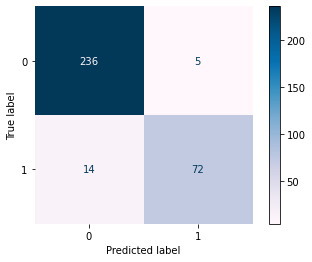

In [38]:
# RF classification using independent variables without filtering (to be compared with)
y0 = dfacrpv['acp']
x0 = dfacrpv[cn]

X_train, X_test, y_train, y_test = train_test_split(x0, y0,
                                                    test_size = 0.3, 
                                                    random_state = 7)
# rfc = RandomForestClassifier(n_estimators = 20, max_depth=5, 
#                               random_state = 6) 

rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = rfc.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred_rfc))
confusion_matrix_rfc = metrics.confusion_matrix(y_test, y_pred_rfc)
cm_display_rfc = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rfc)
cm_display_rfc.plot(cmap = 'PuBu')
plt.box(False)
acc_rfc = metrics.accuracy_score(y_test, y_pred_rfc)
print('accuracy', acc_rfc)
pre_rfc = metrics.precision_score(y_test, y_pred_rfc, average = None)
print('precision', pre_rfc)
senrec_rfc = metrics.recall_score(y_test, y_pred_rfc, average = None)
print('sensitivity recall', senrec_rfc)
f1_rfc = metrics.f1_score(y_test, y_pred_rfc, average = None)
print('f1 score', f1_rfc)
mcc_rfc = metrics.matthews_corrcoef(y_test, y_pred_rfc)
print('mcc score', mcc_rfc)
ka_rfc= metrics.cohen_kappa_score(y_test, y_pred_rfc)
print('kappa', ka_rfc)

In [701]:
# # Finding the best number of estimator
# rf = RandomForestClassifier(n_estimators=50, max_depth= 5, n_jobs=-1)
# rf.fit(X_train, y_train)
# predictions = []
# for tree in rf.estimators_:
#     predictions.append(tree.predict_proba(X_test)[None, :])
# predictions = np.vstack(predictions)
# cum_mean = np.cumsum(predictions, axis=0)/np.arange(1, predictions.shape[0] + 1)[:, None, None]
# scores = []
# for pred in cum_mean:
#     scores.append(accuracy_score(y_test, np.argmax(pred, axis=1)))
# plt.figure(figsize=(10, 6))
# plt.plot(scores, linewidth=3)
# plt.xlabel('num_trees')
# plt.ylabel('accuracy')


In [426]:
# joblib.dump(rfc, "my_random_forest_0_all91var.joblib")

['my_random_forest_0_all91var.joblib']

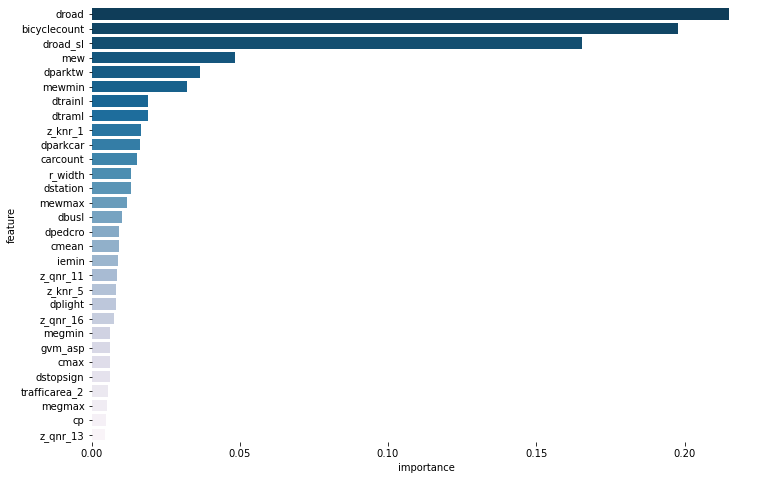

In [39]:
feature_name = list(x0.columns.values.tolist())
importances = rfc.feature_importances_
df_rfc = pd.DataFrame({'features':feature_name, 'importances':importances})
df_rfc.sort_values(by = ['importances'], ascending = False, inplace = True)
# df_rfct = df_rfc
df_rfct = df_rfc.nlargest(30, 'importances')
plt.figure(figsize = [12,8])
sn.barplot(x = df_rfct['importances'], y = df_rfct['features'],palette = "PuBu_r")
plt.xlabel('importance')
plt.ylabel('feature')
plt.box(False)
# plt.savefig('svp_rf_importance_0.png')

In [41]:
print(df_rfc.head(20))

        features  importances
24         droad     0.215096
31  bicyclecount     0.197803
25      droad_sl     0.165416
11           mew     0.048235
20       dparktw     0.036519
5         mewmin     0.032247
16       dtrainl     0.018987
15        dtraml     0.018900
66       z_knr_1     0.016729
19      dparkcar     0.016382
32      carcount     0.015359
29       r_width     0.013437
18      dstation     0.013137
8         mewmax     0.011843
14         dbusl     0.010132
21       dpedcro     0.009204
0          cmean     0.009128
7          iemin     0.008814
43      z_qnr_11     0.008436
70       z_knr_5     0.008357


In [46]:
# Mean decrease accuracy
i_mda = [] # importance mean decrease accuracy
initial_accuracy = accuracy_score(y_test, rfc.predict(X_test)) # initial accuracy
for i in range(x0.shape[1]):
    X_test_copy = X_test.copy()
    l = X_test_copy.iloc[:, i].values.tolist()
    X_test_copy.iloc[:,i] = np.random.shuffle(l)
    shuff_accuracy = accuracy_score(y_test, rfc.predict(X_test_copy))
    i_mda.append(initial_accuracy - shuff_accuracy)
    
accuracy_df = pd.DataFrame({'Feature': cn, 'Decrease in Accuracy': i_mda}).sort_values('Decrease in Accuracy', ascending=False)
print(accuracy_df)

         Feature  Decrease in Accuracy
31  bicyclecount              0.082569
25      droad_sl              0.061162
24         droad              0.058104
14         dbusl              0.009174
11           mew              0.009174
..           ...                   ...
9         megmax             -0.003058
7          iemin             -0.003058
32      carcount             -0.003058
29       r_width             -0.006116
71       z_knr_6             -0.006116

[91 rows x 2 columns]


In [50]:
accuracy_df['absolute'] = abs(accuracy_df['Decrease in Accuracy'])
accuracy_df = accuracy_df.sort_values('absolute', ascending=False)

In [52]:
print(accuracy_df.head(20))

         Feature  Decrease in Accuracy  absolute
31  bicyclecount              0.082569  0.082569
25      droad_sl              0.061162  0.061162
24         droad              0.058104  0.058104
14         dbusl              0.009174  0.009174
11           mew              0.009174  0.009174
29       r_width             -0.006116  0.006116
71       z_knr_6             -0.006116  0.006116
8         mewmax              0.006116  0.006116
70       z_knr_5              0.006116  0.006116
21       dpedcro              0.006116  0.006116
55      z_qnr_23              0.003058  0.003058
17       dplight              0.003058  0.003058
83     r_width_5              0.003058  0.003058
0          cmean              0.003058  0.003058
16       dtrainl              0.003058  0.003058
30    speedlimit              0.003058  0.003058
5         mewmin              0.003058  0.003058
27       gvm_msp              0.003058  0.003058
9         megmax             -0.003058  0.003058
13            ie    

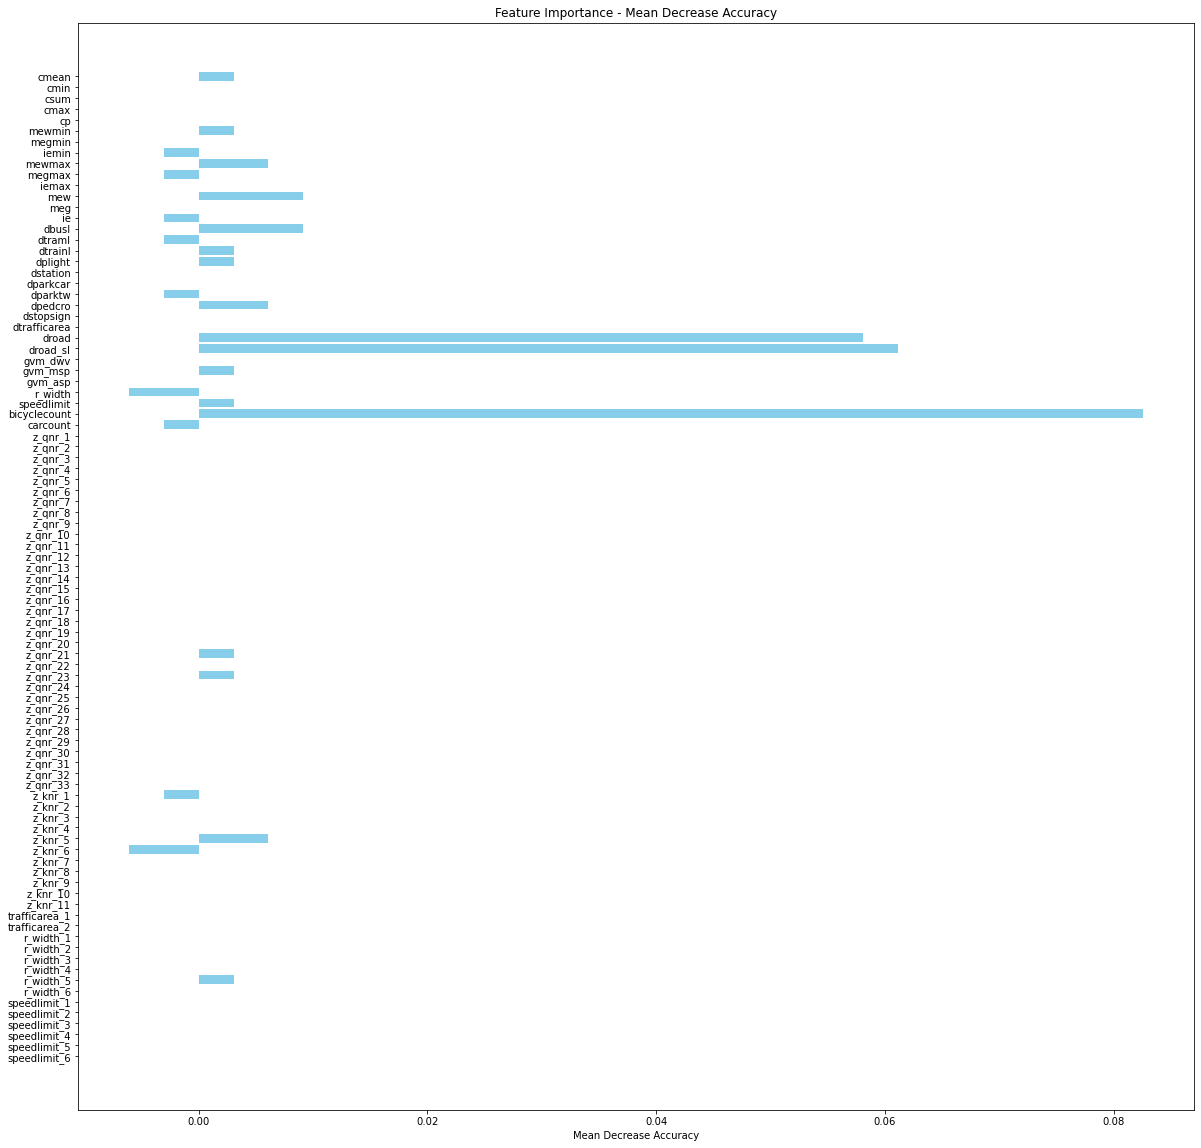

In [645]:
plt.figure(figsize=(20, 20))
plt.barh(cn, i_mda, color='skyblue')
plt.xlabel('Mean Decrease Accuracy')
plt.title('Feature Importance - Mean Decrease Accuracy')
plt.gca().invert_yaxis() 
plt.savefig('mda_rf0_91.png')
plt.show()

In [661]:
# Permutation feature importance
result = permutation_importance(rfc, X_test, y_test, n_repeats=10, random_state=0, n_jobs=-1)
perm_imp_df = pd.DataFrame({'Feature': cn, 'Permutation Importance': result.importances_mean}).sort_values('Permutation Importance', ascending=False)
print(perm_imp_df)

         Feature  Permutation Importance
31  bicyclecount                0.096942
25      droad_sl                0.077676
24         droad                0.075535
8         mewmax                0.008257
5         mewmin                0.006116
..           ...                     ...
9         megmax               -0.001835
29       r_width               -0.003364
66       z_knr_1               -0.003670
13            ie               -0.003670
71       z_knr_6               -0.004281

[91 rows x 2 columns]


         Feature  Permutation Importance
31  bicyclecount                0.096942
25      droad_sl                0.077676
24         droad                0.075535
8         mewmax                0.008257
5         mewmin                0.006116
70       z_knr_5                0.005199
14         dbusl                0.005199
11           mew                0.004893
0          cmean                0.004281
16       dtrainl                0.004281
21       dpedcro                0.004281
20       dparktw                0.003364
53      z_qnr_21                0.003058
3           cmax                0.003058
55      z_qnr_23                0.002752
27       gvm_msp                0.002752
83     r_width_5                0.002752
30    speedlimit                0.002752
19      dparkcar                0.002446
22     dstopsign                0.001835


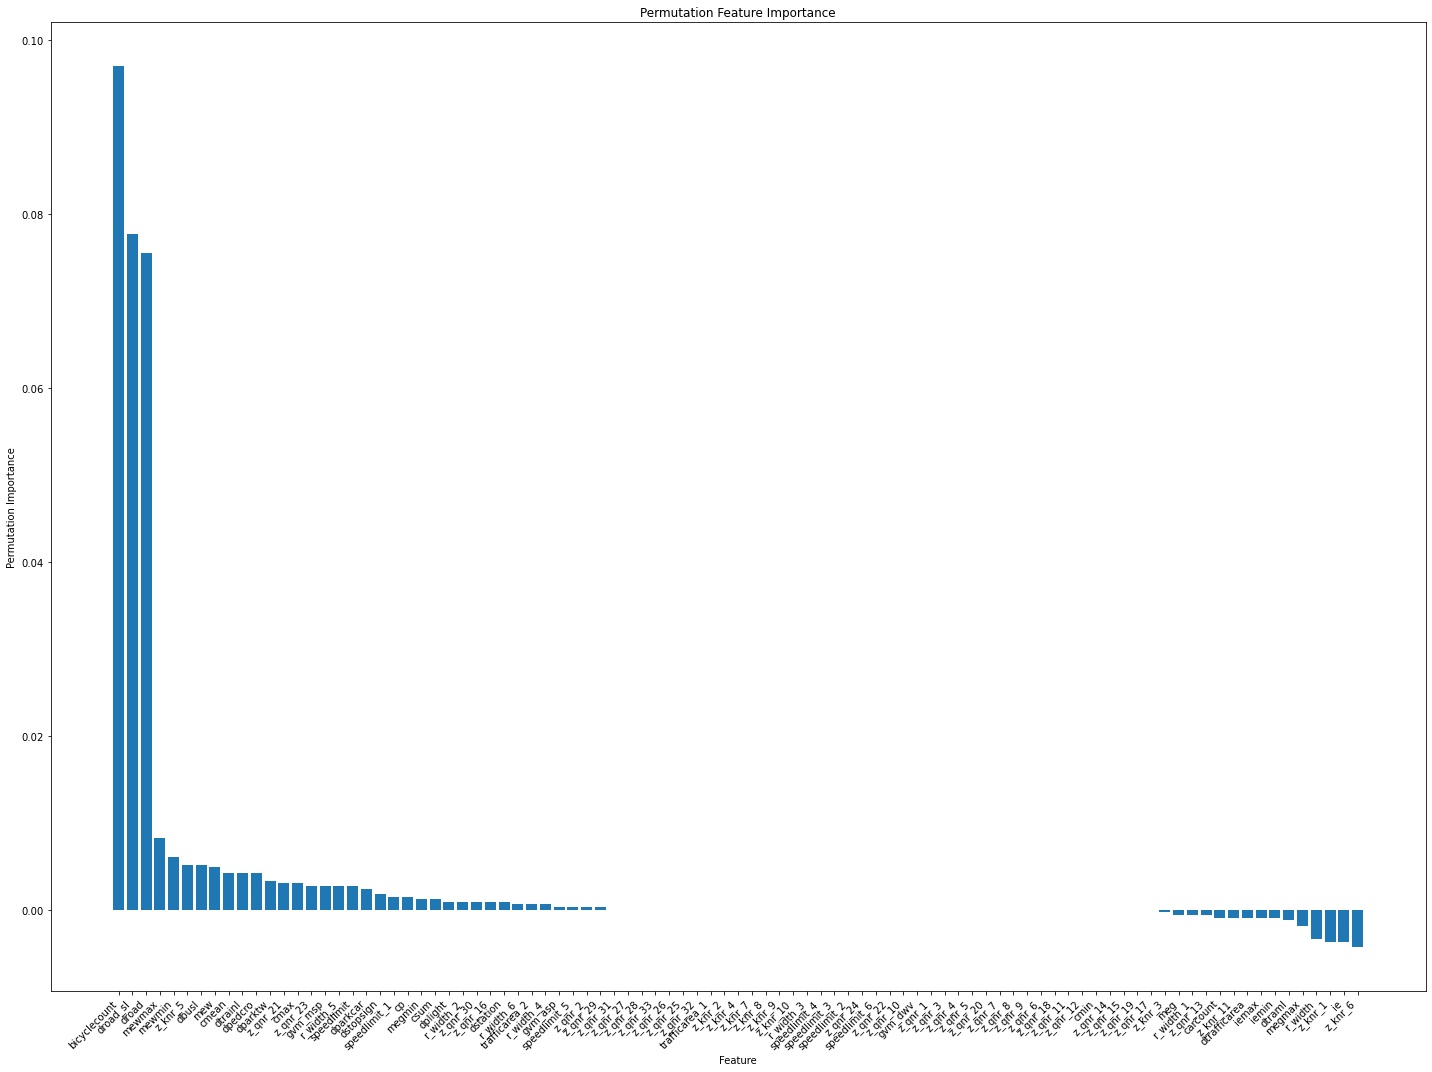

In [670]:
print(perm_imp_df.head(20))
plt.figure(figsize=(20, 15))
plt.bar(perm_imp_df['Feature'], perm_imp_df['Permutation Importance'])
plt.xlabel('Feature')
plt.ylabel('Permutation Importance')
plt.title('Permutation Feature Importance')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility
plt.tight_layout()
plt.savefig('pfi_rf0_91.png')
plt.show()

In [53]:
# # SHAP value
# explainer = shap.TreeExplainer(rfc)
# shap_values = explainer.shap_values(X_test)
# shap_summary = np.abs(shap_values).mean(axis=0) 
# shap_summary_df = pd.DataFrame({'Feature': cn[:-1], 'SHAP values': shap_summary})
# shap_summary_df = shap_summary_df.sort_values('SHAP values', ascending=False)
# print(shap_summary_df)

# # Visualization
# plt.figure(figsize=(10, 6))
# plt.barh(shap_summary_df['Feature'], shap_summary_df['SHAP values'], color='skyblue')
# plt.xlabel('Mean Absolute SHAP Value')
# plt.ylabel('Feature')
# plt.title('Feature Importance based on SHAP Values')
# plt.gca().invert_yaxis() 
# plt.show()

## With cnvif - size 60

In [54]:
y = dfacrpv['acp']
x = dfacrpv[cnvif] 
print(len(cnvif))

60


In [55]:
rfc = joblib.load('my_random_forest_1_cnvif60.joblib')

Train data accuracy: 0.9986842105263158
Test data accuracy: 0.9510703363914373
accuracy 0.9510703363914373
precision [0.94820717 0.96052632]
sensitivity recall [0.98755187 0.84883721]
f1 score [0.96747967 0.90123457]
mcc score 0.871811196351556
kappa 0.8688787529447146


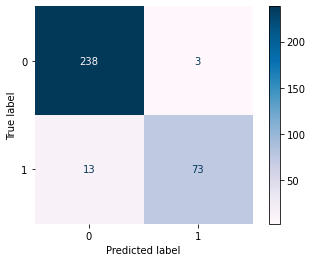

In [56]:

X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.3, 
                                                    random_state = 7)
# rfc = RandomForestClassifier(n_estimators=20, max_depth=10, 
#                               random_state = 7) # 10 because of following codes to find the best number of trees
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = rfc.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred_rfc))
confusion_matrix_rfc = metrics.confusion_matrix(y_test, y_pred_rfc)
cm_display_rfc = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rfc)
cm_display_rfc.plot(cmap = 'PuBu')
plt.box(False)
acc_rfc = metrics.accuracy_score(y_test, y_pred_rfc)
print('accuracy', acc_rfc)
pre_rfc = metrics.precision_score(y_test, y_pred_rfc, average = None)
print('precision', pre_rfc)
senrec_rfc = metrics.recall_score(y_test, y_pred_rfc, average = None)
print('sensitivity recall', senrec_rfc)
f1_rfc = metrics.f1_score(y_test, y_pred_rfc, average = None)
print('f1 score', f1_rfc)
mcc_rfc = metrics.matthews_corrcoef(y_test, y_pred_rfc)
print('mcc score', mcc_rfc)
ka_rfc= metrics.cohen_kappa_score(y_test, y_pred_rfc)
print('kappa', ka_rfc)

In [700]:
# # Finding the best number of estimator
# rf = RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1)
# rf.fit(X_train, y_train)
# predictions = []
# for tree in rf.estimators_:
#     predictions.append(tree.predict_proba(X_test)[None, :])
# predictions = np.vstack(predictions)
# cum_mean = np.cumsum(predictions, axis=0)/np.arange(1, predictions.shape[0] + 1)[:, None, None]
# scores = []
# for pred in cum_mean:
#     scores.append(accuracy_score(y_test, np.argmax(pred, axis=1)))
# plt.figure(figsize=(10, 6))
# plt.plot(scores, linewidth=3)
# plt.xlabel('num_trees')
# plt.ylabel('accuracy')


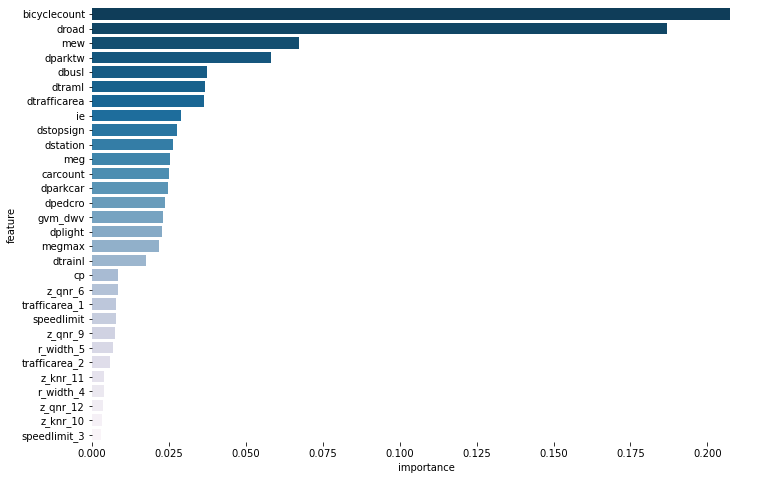

In [57]:
feature_name = list(x.columns.values.tolist())
importances = rfc.feature_importances_
df_rfc = pd.DataFrame({'features':feature_name, 'importances':importances})
df_rfc.sort_values(by = ['importances'], ascending = False, inplace = True)
df_rfct = df_rfc.nlargest(30, 'importances')
plt.figure(figsize = [12,8])
sn.barplot(x = df_rfct['importances'], y = df_rfct['features'],palette = "PuBu_r")
plt.xlabel('importance')
plt.ylabel('feature')
plt.box(False)
# plt.savefig('svp_rf_importance_1.png')

In [60]:
print(df_rfc.head(20))

        features  importances
19  bicyclecount     0.207195
16         droad     0.186972
3            mew     0.067357
12       dparktw     0.058145
6          dbusl     0.037296
7         dtraml     0.036677
15  dtrafficarea     0.036409
2             ie     0.028884
14     dstopsign     0.027559
10      dstation     0.026381
4            meg     0.025534
20      carcount     0.025227
11      dparkcar     0.024813
13       dpedcro     0.023665
17       gvm_dwv     0.023052
9        dplight     0.022875
5         megmax     0.021723
8        dtrainl     0.017451
0             cp     0.008614
25       z_qnr_6     0.008383


In [58]:
# joblib.dump(rfc, "my_random_forest_1_cnvif60.joblib")

In [59]:
# print(df_rfc['features'].tolist())

In [61]:
# Mean decrease accuracy
i_mda = [] # importance mean decrease accuracy
initial_accuracy = accuracy_score(y_test, rfc.predict(X_test)) # initial accuracy
for i in range(x.shape[1]):
    X_test_copy = X_test.copy()
    l = X_test_copy.iloc[:, i].values.tolist()
    X_test_copy.iloc[:,i] = np.random.shuffle(l)
    shuff_accuracy = accuracy_score(y_test, rfc.predict(X_test_copy))
    i_mda.append(initial_accuracy - shuff_accuracy)
    
accuracy_df = pd.DataFrame({'Feature': cnvif, 'Decrease in Accuracy': i_mda}).sort_values('Decrease in Accuracy', ascending=False)
print(accuracy_df)

          Feature  Decrease in Accuracy
19   bicyclecount              0.113150
16          droad              0.064220
3             mew              0.012232
10       dstation              0.012232
12        dparktw              0.006116
17        gvm_dwv              0.006116
6           dbusl              0.006116
15   dtrafficarea              0.006116
14      dstopsign              0.006116
0              cp              0.003058
29       z_qnr_12              0.003058
18     speedlimit              0.003058
11       dparkcar              0.003058
57   speedlimit_3              0.003058
5          megmax              0.003058
4             meg              0.003058
47       z_knr_10              0.000000
39       z_qnr_28              0.000000
40       z_qnr_31              0.000000
41       z_qnr_32              0.000000
42       z_qnr_33              0.000000
43        z_knr_2              0.000000
44        z_knr_3              0.000000
58   speedlimit_5              0.000000


In [62]:
accuracy_df['absolute'] = abs(accuracy_df['Decrease in Accuracy'])
accuracy_df = accuracy_df.sort_values('absolute', ascending=False)

In [63]:
print(accuracy_df.head(20))

         Feature  Decrease in Accuracy  absolute
19  bicyclecount              0.113150  0.113150
16         droad              0.064220  0.064220
3            mew              0.012232  0.012232
10      dstation              0.012232  0.012232
12       dparktw              0.006116  0.006116
17       gvm_dwv              0.006116  0.006116
6          dbusl              0.006116  0.006116
15  dtrafficarea              0.006116  0.006116
14     dstopsign              0.006116  0.006116
57  speedlimit_3              0.003058  0.003058
4            meg              0.003058  0.003058
5         megmax              0.003058  0.003058
13       dpedcro             -0.003058  0.003058
11      dparkcar              0.003058  0.003058
29      z_qnr_12              0.003058  0.003058
18    speedlimit              0.003058  0.003058
0             cp              0.003058  0.003058
24       z_qnr_4              0.000000  0.000000
2             ie              0.000000  0.000000
7         dtraml    

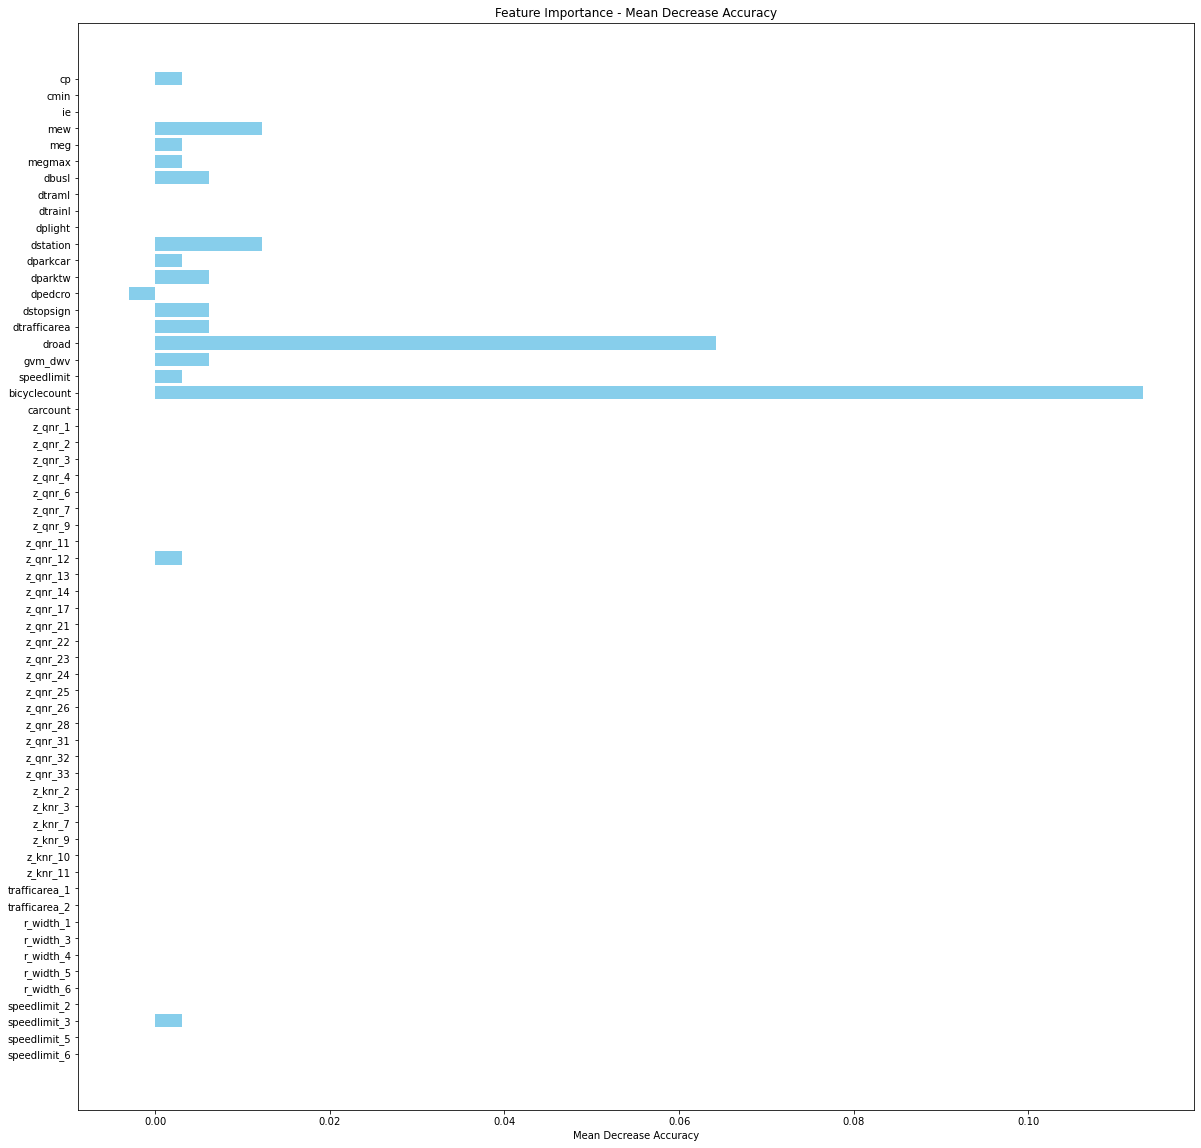

In [650]:
plt.figure(figsize=(20, 20))
plt.barh(cnvif, i_mda, color='skyblue')
plt.xlabel('Mean Decrease Accuracy')
plt.title('Feature Importance - Mean Decrease Accuracy')
plt.gca().invert_yaxis() 
plt.savefig('mda_rf1_cnvif60.png')
plt.show()

In [674]:
# Permutation feature importance
result = permutation_importance(rfc, X_test, y_test, n_repeats=10, random_state=0, n_jobs=-1)
perm_imp_df = pd.DataFrame({'Feature': cnvif, 'Permutation Importance': result.importances_mean}).sort_values('Permutation Importance', ascending=False)
print(perm_imp_df)

          Feature  Permutation Importance
19   bicyclecount                0.132110
16          droad                0.112232
3             mew                0.022018
12        dparktw                0.019266
11       dparkcar                0.013456
10       dstation                0.011009
4             meg                0.007951
17        gvm_dwv                0.006728
7          dtraml                0.006728
6           dbusl                0.006422
15   dtrafficarea                0.004281
29       z_qnr_12                0.003364
18     speedlimit                0.003364
14      dstopsign                0.003364
8         dtrainl                0.003058
0              cp                0.002446
5          megmax                0.002141
9         dplight                0.001835
57   speedlimit_3                0.001223
13        dpedcro                0.000917
53      r_width_4                0.000612
43        z_knr_2                0.000612
51      r_width_1                0

         Feature  Permutation Importance
19  bicyclecount                0.132110
16         droad                0.112232
3            mew                0.022018
12       dparktw                0.019266
11      dparkcar                0.013456
10      dstation                0.011009
4            meg                0.007951
17       gvm_dwv                0.006728
7         dtraml                0.006728
6          dbusl                0.006422
15  dtrafficarea                0.004281
29      z_qnr_12                0.003364
18    speedlimit                0.003364
14     dstopsign                0.003364
8        dtrainl                0.003058
0             cp                0.002446
5         megmax                0.002141
9        dplight                0.001835
57  speedlimit_3                0.001223
13       dpedcro                0.000917


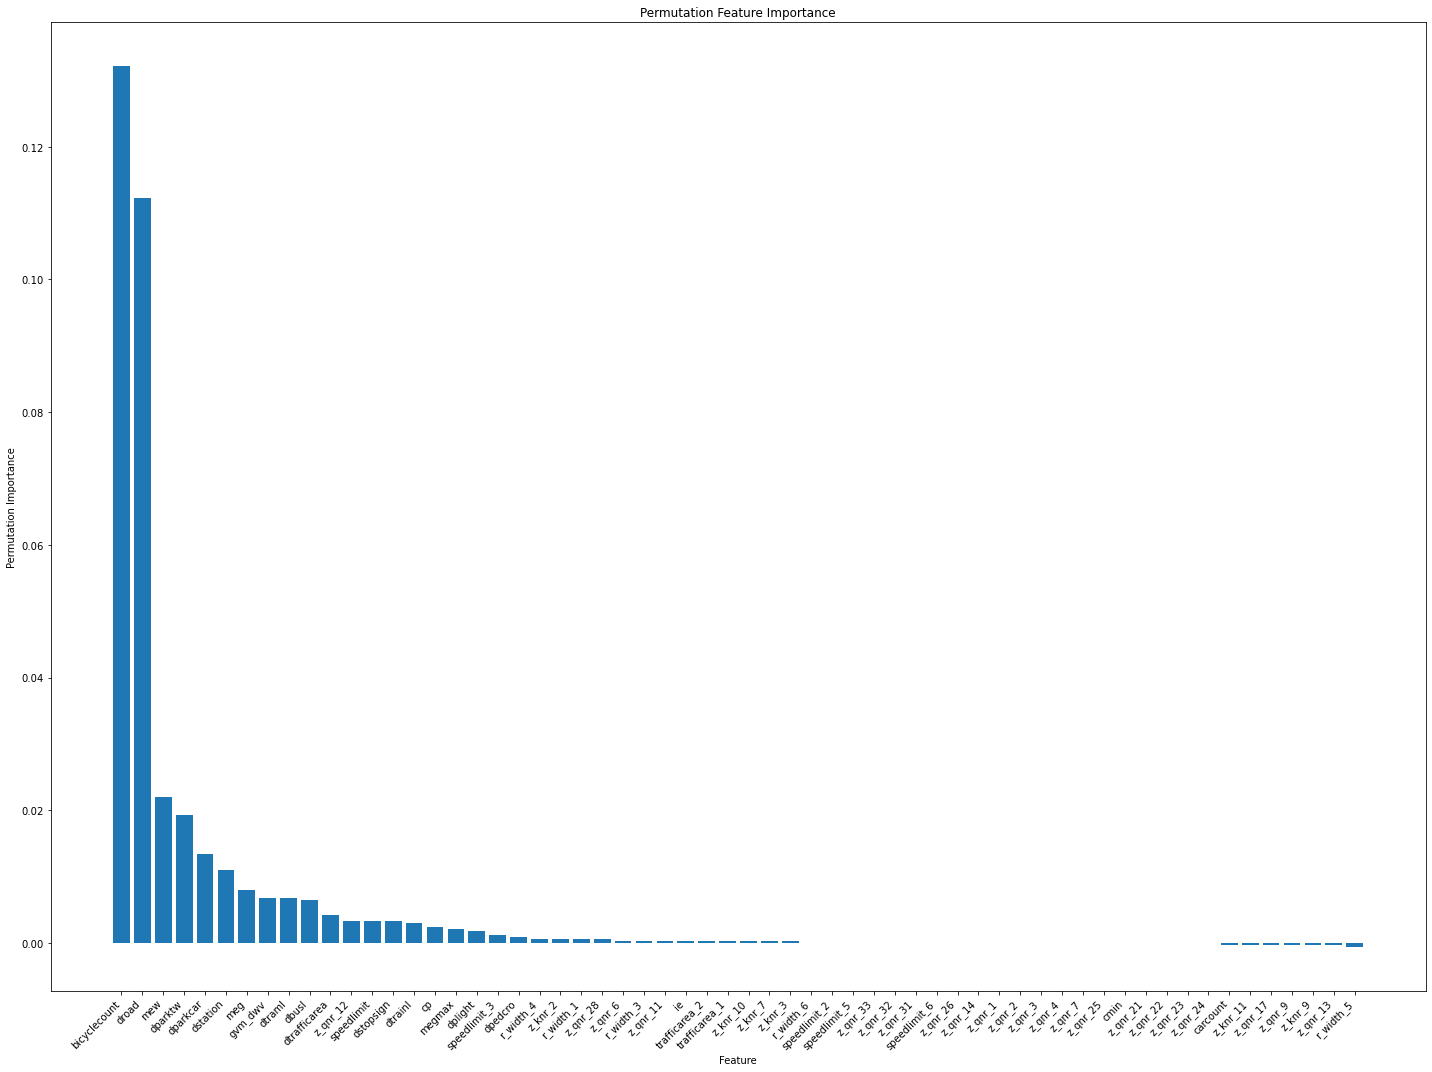

In [675]:
print(perm_imp_df.head(20))
plt.figure(figsize=(20, 15))
plt.bar(perm_imp_df['Feature'], perm_imp_df['Permutation Importance'])
plt.xlabel('Feature')
plt.ylabel('Permutation Importance')
plt.title('Permutation Feature Importance')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility
plt.tight_layout()
plt.savefig('pfi_rf1_cnvif_60.png')
plt.show()

## With cntry1 - size 63

In [64]:
# cntry1 = cnvif + cmean, cmax, csum
cntry1 = ['cp', 'cmin', 'cmean', 'cmax', 'csum', 
          'ie', 'mew', 'meg', 'megmax', 'dbusl', 'dtraml', 'dtrainl', 
          'dplight', 'dstation', 'dparkcar', 'dparktw', 'dpedcro', 
          'dstopsign', 'dtrafficarea', 'droad', 'gvm_dwv', 'speedlimit', 
          'bicyclecount', 'carcount', 'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 
          'z_qnr_4', 'z_qnr_6', 'z_qnr_7', 'z_qnr_9', 'z_qnr_11', 'z_qnr_12', 
          'z_qnr_13', 'z_qnr_14', 'z_qnr_17', 'z_qnr_21', 'z_qnr_22', 
          'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_28', 
          'z_qnr_31', 'z_qnr_32', 'z_qnr_33', 'z_knr_2', 'z_knr_3', 
          'z_knr_7', 'z_knr_9', 'z_knr_10', 'z_knr_11', 'trafficarea_1', 
          'trafficarea_2', 'r_width_1', 'r_width_3', 'r_width_4', 
          'r_width_5', 'r_width_6', 'speedlimit_2', 'speedlimit_3', 
          'speedlimit_5', 'speedlimit_6']

In [65]:
y = dfacrpv['acp']

x = dfacrpv[cntry1] 
print(len(cntry1))

X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.3, 
                                                    random_state = 7)

63


In [66]:
rfc = joblib.load('my_random_forest_2_cnvifandcurbvar63.joblib')

Train data accuracy: 0.9986842105263158
Test data accuracy: 0.9480122324159022
accuracy 0.9480122324159022
precision [0.94094488 0.97260274]
sensitivity recall [0.99170124 0.8255814 ]
f1 score [0.96565657 0.89308176]
mcc score 0.864075582404673
kappa 0.8590410021046225


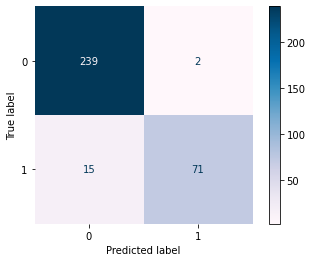

In [67]:
# rfc = RandomForestClassifier(n_estimators=20, max_depth=12, 
#                               random_state = 7) 
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = rfc.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred_rfc))
confusion_matrix_rfc = metrics.confusion_matrix(y_test, y_pred_rfc)
cm_display_rfc = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rfc)
cm_display_rfc.plot(cmap = 'PuBu')
plt.box(False)
acc_rfc = metrics.accuracy_score(y_test, y_pred_rfc)
print('accuracy', acc_rfc)
pre_rfc = metrics.precision_score(y_test, y_pred_rfc, average = None)
print('precision', pre_rfc)
senrec_rfc = metrics.recall_score(y_test, y_pred_rfc, average = None)
print('sensitivity recall', senrec_rfc)
f1_rfc = metrics.f1_score(y_test, y_pred_rfc, average = None)
print('f1 score', f1_rfc)
mcc_rfc = metrics.matthews_corrcoef(y_test, y_pred_rfc)
print('mcc score', mcc_rfc)
ka_rfc= metrics.cohen_kappa_score(y_test, y_pred_rfc)
print('kappa', ka_rfc)

In [699]:
# # Finding the best number of estimator
# rf = RandomForestClassifier(n_estimators=50, max_depth=12, n_jobs=-1)
# rf.fit(X_train, y_train)
# predictions = []
# for tree in rf.estimators_:
#     predictions.append(tree.predict_proba(X_test)[None, :])
# predictions = np.vstack(predictions)
# cum_mean = np.cumsum(predictions, axis=0)/np.arange(1, predictions.shape[0] + 1)[:, None, None]
# scores = []
# for pred in cum_mean:
#     scores.append(accuracy_score(y_test, np.argmax(pred, axis=1)))
# plt.figure(figsize=(10, 6))
# plt.plot(scores, linewidth=3)
# plt.xlabel('num_trees')
# plt.ylabel('accuracy')
# # best n_estimator 20

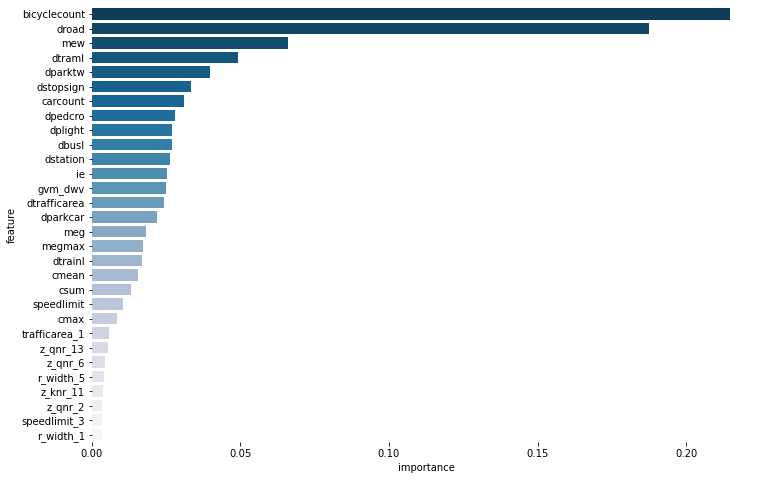

In [68]:
feature_name = list(x.columns.values.tolist())
importances = rfc.feature_importances_
df_rfc = pd.DataFrame({'features':feature_name, 'importances':importances})
df_rfc.sort_values(by = ['importances'], ascending = False, inplace = True)
df_rfct = df_rfc.nlargest(30, 'importances')
plt.figure(figsize = [12,8])
sn.barplot(x = df_rfct['importances'], y = df_rfct['features'],palette = "PuBu_r")
plt.xlabel('importance')
plt.ylabel('feature')
plt.box(False)
# plt.savefig('svp_rf_importance_3.png')

In [70]:
print(df_rfc.head(20))

        features  importances
22  bicyclecount     0.214552
19         droad     0.187451
6            mew     0.065977
10        dtraml     0.049140
15       dparktw     0.039778
17     dstopsign     0.033506
23      carcount     0.030881
16       dpedcro     0.028123
12       dplight     0.027061
9          dbusl     0.026845
13      dstation     0.026306
5             ie     0.025456
20       gvm_dwv     0.024918
18  dtrafficarea     0.024429
14      dparkcar     0.022049
7            meg     0.018238
8         megmax     0.017296
11       dtrainl     0.016725
2          cmean     0.015391
4           csum     0.013339


In [71]:
# Mean decrease accuracy
i_mda = [] # importance mean decrease accuracy
initial_accuracy = accuracy_score(y_test, rfc.predict(X_test)) # initial accuracy
for i in range(x.shape[1]):
    X_test_copy = X_test.copy()
    l = X_test_copy.iloc[:, i].values.tolist()
    X_test_copy.iloc[:,i] = np.random.shuffle(l)
    shuff_accuracy = accuracy_score(y_test, rfc.predict(X_test_copy))
    i_mda.append(initial_accuracy - shuff_accuracy)
    
accuracy_df = pd.DataFrame({'Feature': cntry1, 'Decrease in Accuracy': i_mda}).sort_values('Decrease in Accuracy', ascending=False)
print(accuracy_df)

         Feature  Decrease in Accuracy
22  bicyclecount              0.116208
19         droad              0.079511
6            mew              0.015291
15       dparktw              0.012232
20       gvm_dwv              0.012232
..           ...                   ...
50      z_knr_10             -0.003058
17     dstopsign             -0.006116
13      dstation             -0.006116
11       dtrainl             -0.006116
5             ie             -0.009174

[63 rows x 2 columns]


In [72]:
accuracy_df['absolute'] = abs(accuracy_df['Decrease in Accuracy'])
accuracy_df = accuracy_df.sort_values('absolute', ascending=False)

In [73]:
print(accuracy_df.head(20))

          Feature  Decrease in Accuracy  absolute
22   bicyclecount              0.116208  0.116208
19          droad              0.079511  0.079511
6             mew              0.015291  0.015291
15        dparktw              0.012232  0.012232
20        gvm_dwv              0.012232  0.012232
7             meg              0.009174  0.009174
10         dtraml              0.009174  0.009174
57      r_width_5              0.009174  0.009174
14       dparkcar              0.009174  0.009174
5              ie             -0.009174  0.009174
3            cmax              0.006116  0.006116
52  trafficarea_1              0.006116  0.006116
8          megmax              0.006116  0.006116
53  trafficarea_2              0.006116  0.006116
11        dtrainl             -0.006116  0.006116
13       dstation             -0.006116  0.006116
17      dstopsign             -0.006116  0.006116
2           cmean             -0.003058  0.003058
21     speedlimit             -0.003058  0.003058


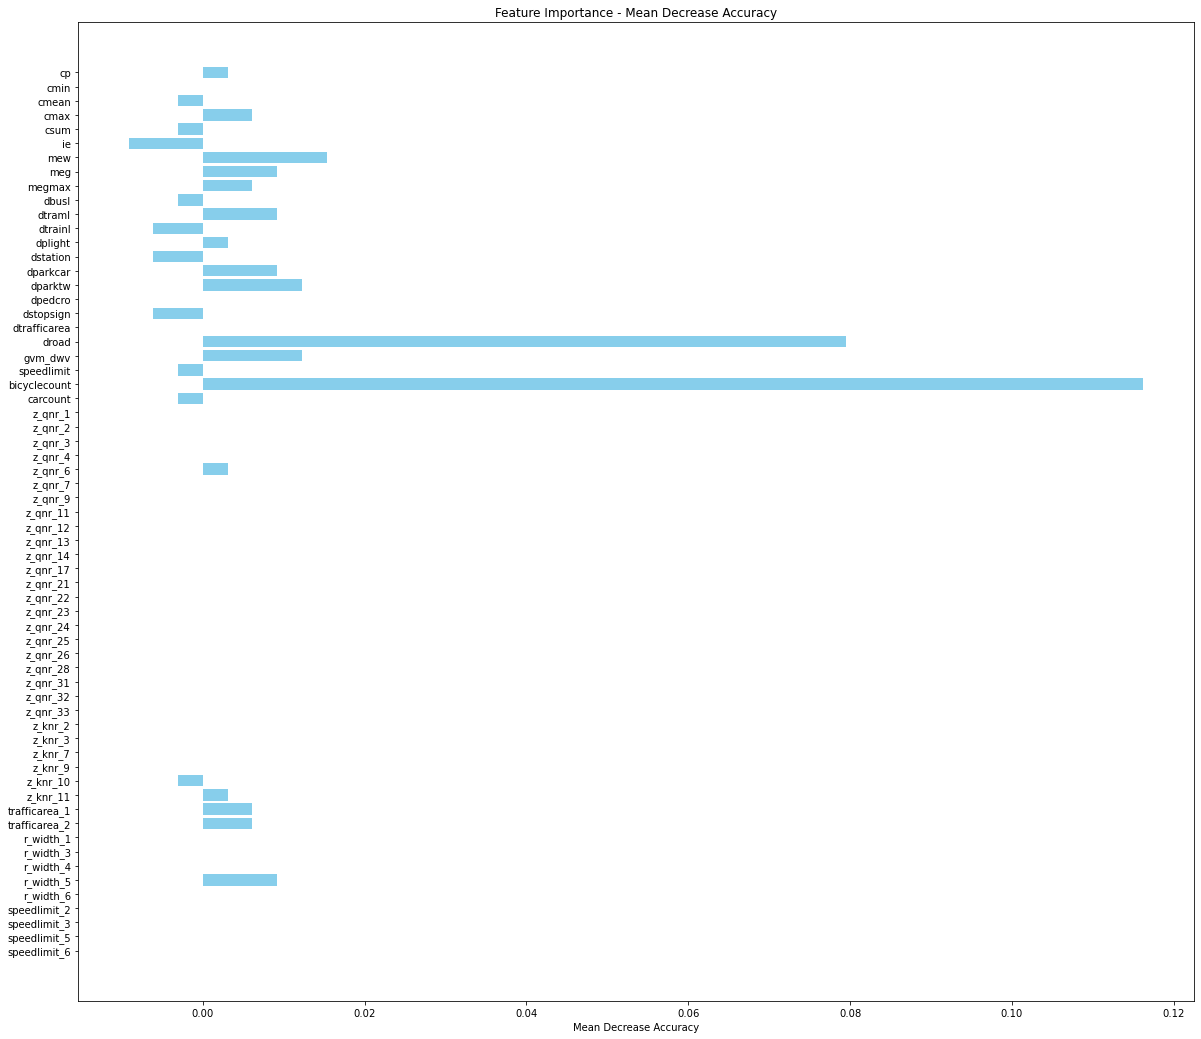

In [656]:
plt.figure(figsize=(20, 18))
plt.barh(cntry1, i_mda, color='skyblue')
plt.xlabel('Mean Decrease Accuracy')
plt.title('Feature Importance - Mean Decrease Accuracy')
plt.gca().invert_yaxis() 
plt.savefig('mda_rf2_cntry1_63.png')
plt.show()

In [696]:
# Permutation feature importance
result = permutation_importance(rfc, X_test, y_test, n_repeats=10, random_state=0, n_jobs=-1)
perm_imp_df = pd.DataFrame({'Feature': cntry1, 'Permutation Importance': result.importances_mean}).sort_values('Permutation Importance', ascending=False)
# print(perm_imp_df)

          Feature  Permutation Importance
22   bicyclecount                0.133333
19          droad                0.117431
6             mew                0.021407
15        dparktw                0.018654
20        gvm_dwv                0.009174
13       dstation                0.008257
8          megmax                0.007034
10         dtraml                0.006422
9           dbusl                0.006422
7             meg                0.006422
52  trafficarea_1                0.006116
53  trafficarea_2                0.005810
51       z_knr_11                0.004587
14       dparkcar                0.004281
33       z_qnr_13                0.003058
4            csum                0.002446
28        z_qnr_6                0.002446
0              cp                0.002141
3            cmax                0.000612
25        z_qnr_2                0.000612


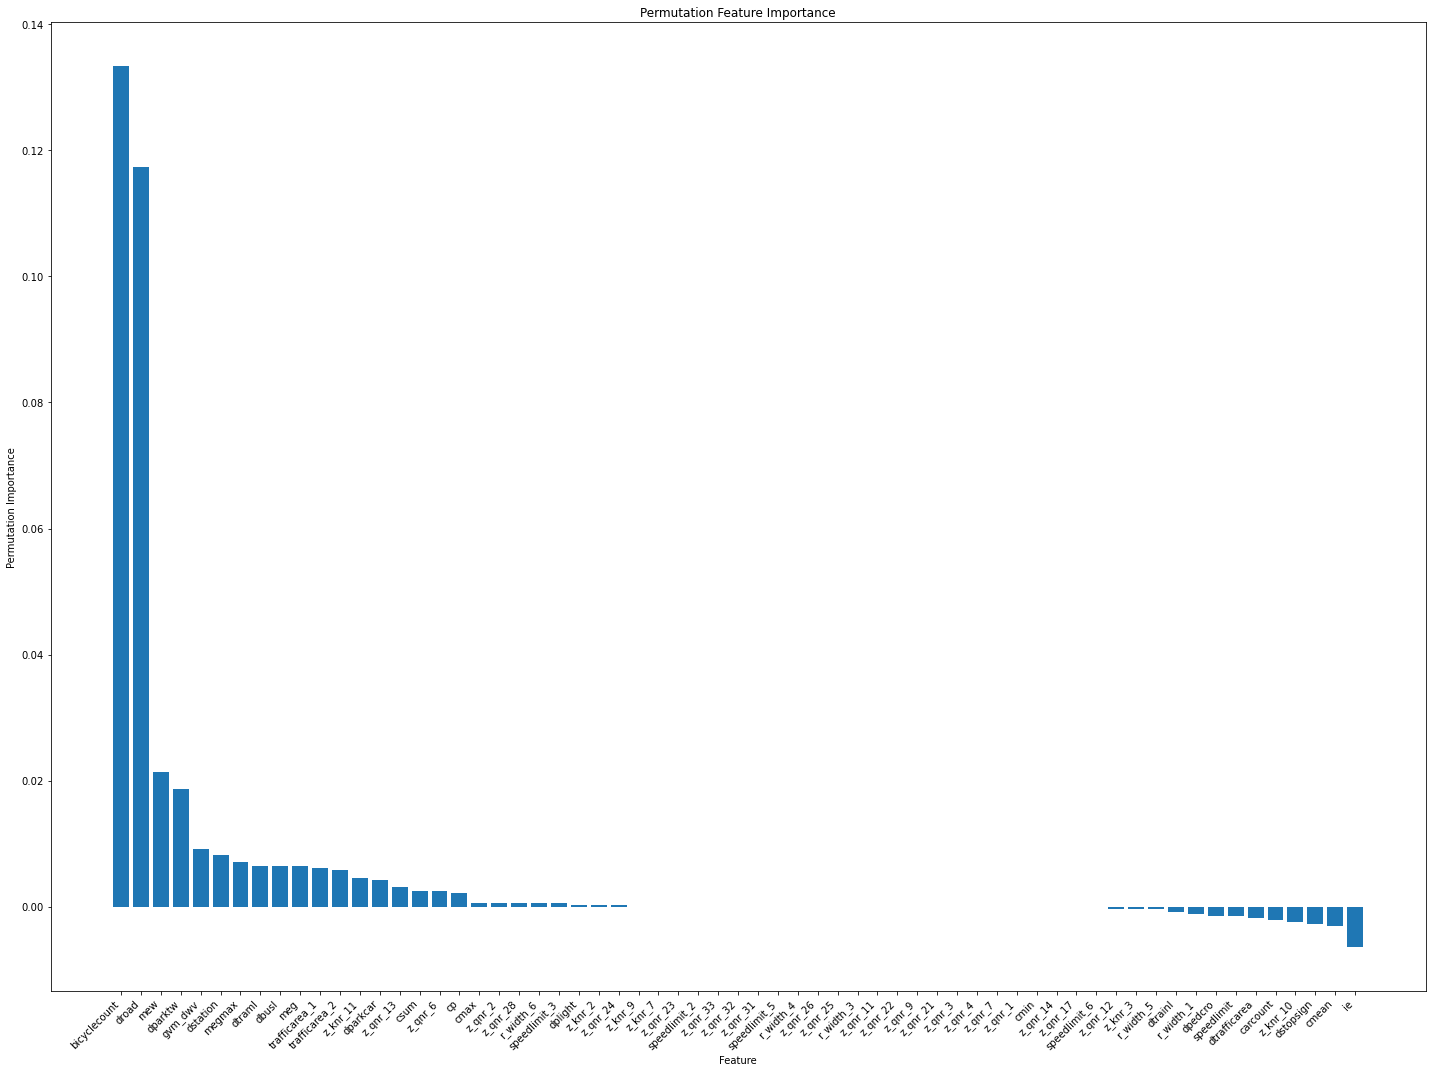

In [697]:
print(perm_imp_df.head(20))
plt.figure(figsize=(20, 15))
plt.bar(perm_imp_df['Feature'], perm_imp_df['Permutation Importance'])
plt.xlabel('Feature')
plt.ylabel('Permutation Importance')
plt.title('Permutation Feature Importance')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility
plt.tight_layout()
plt.savefig('pfi_rf2_cntry1_63.png')
plt.show()

## With cnvifnew - size 61

In [78]:
# cnvifnew = cnvif + cmean
print(cnvifnew)

['cp', 'cmin', 'cmean', 'ie', 'mew', 'meg', 'megmax', 'dbusl', 'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw', 'dpedcro', 'dstopsign', 'dtrafficarea', 'droad', 'gvm_dwv', 'speedlimit', 'bicyclecount', 'carcount', 'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_6', 'z_qnr_7', 'z_qnr_9', 'z_qnr_11', 'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_17', 'z_qnr_21', 'z_qnr_22', 'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_28', 'z_qnr_31', 'z_qnr_32', 'z_qnr_33', 'z_knr_2', 'z_knr_3', 'z_knr_7', 'z_knr_9', 'z_knr_10', 'z_knr_11', 'trafficarea_1', 'trafficarea_2', 'r_width_1', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6', 'speedlimit_2', 'speedlimit_3', 'speedlimit_5', 'speedlimit_6']


In [79]:
y = dfacrpv['acp']
x = dfacrpv[cnvifnew]
print(len(cnvifnew))

X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.3, 
                                                    random_state = 7)

61


Train data accuracy: 0.9973684210526316
Test data accuracy: 0.9541284403669725
accuracy 0.9541284403669725
precision [0.9484127  0.97333333]
sensitivity recall [0.99170124 0.84883721]
f1 score [0.96957404 0.9068323 ]
mcc score 0.8802062170940408
kappa 0.8765944599592422


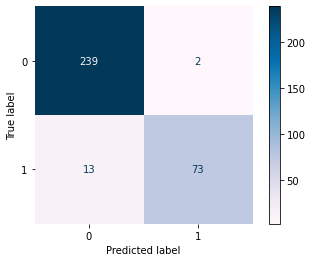

In [80]:
rfc = joblib.load('my_random_forest_3_cnvifandcmean61.joblib')
# rfc = RandomForestClassifier(n_estimators=20, max_depth=12, 
#                               random_state = 7) 
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = rfc.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred_rfc))
confusion_matrix_rfc = metrics.confusion_matrix(y_test, y_pred_rfc)
cm_display_rfc = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rfc)
cm_display_rfc.plot(cmap = 'PuBu')
plt.box(False)
acc_rfc = metrics.accuracy_score(y_test, y_pred_rfc)
print('accuracy', acc_rfc)
pre_rfc = metrics.precision_score(y_test, y_pred_rfc, average = None)
print('precision', pre_rfc)
senrec_rfc = metrics.recall_score(y_test, y_pred_rfc, average = None)
print('sensitivity recall', senrec_rfc)
f1_rfc = metrics.f1_score(y_test, y_pred_rfc, average = None)
print('f1 score', f1_rfc)
mcc_rfc = metrics.matthews_corrcoef(y_test, y_pred_rfc)
print('mcc score', mcc_rfc)
ka_rfc= metrics.cohen_kappa_score(y_test, y_pred_rfc)
print('kappa', ka_rfc)

In [81]:
# # Finding the best number of estimator
# rf = RandomForestClassifier(n_estimators=50, max_depth=12, n_jobs=-1)
# rf.fit(X_train, y_train)
# predictions = []
# for tree in rf.estimators_:
#     predictions.append(tree.predict_proba(X_test)[None, :])
# predictions = np.vstack(predictions)
# cum_mean = np.cumsum(predictions, axis=0)/np.arange(1, predictions.shape[0] + 1)[:, None, None]
# scores = []
# for pred in cum_mean:
#     scores.append(accuracy_score(y_test, np.argmax(pred, axis=1)))
# plt.figure(figsize=(10, 6))
# plt.plot(scores, linewidth=3)
# plt.xlabel('num_trees')
# plt.ylabel('accuracy')
# # best n_estimator 20

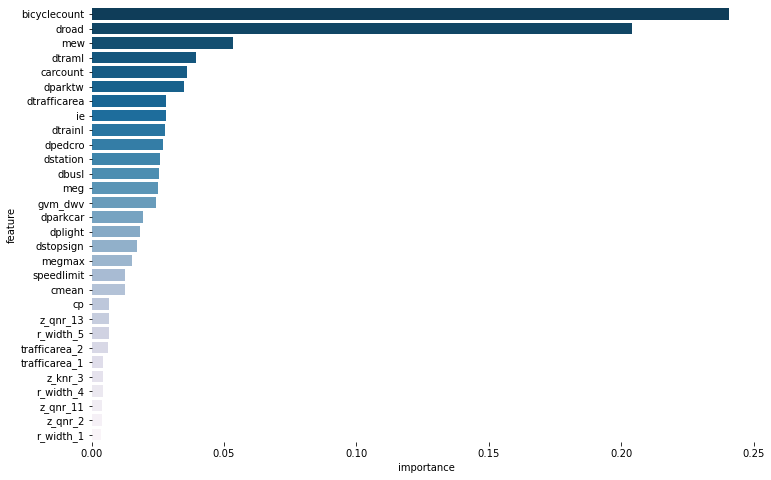

In [82]:
feature_name = list(x.columns.values.tolist())
importances = rfc.feature_importances_
df_rfc = pd.DataFrame({'features':feature_name, 'importances':importances})
df_rfc.sort_values(by = ['importances'], ascending = False, inplace = True)
df_rfct = df_rfc.nlargest(30, 'importances')
plt.figure(figsize = [12,8])
sn.barplot(x = df_rfct['importances'], y = df_rfct['features'],palette = "PuBu_r")
plt.xlabel('importance')
plt.ylabel('feature')
plt.box(False)
# plt.savefig('svp_rf_importance_3.png')

In [83]:
print(df_rfc.head(20))

        features  importances
20  bicyclecount     0.240831
17         droad     0.204084
4            mew     0.053367
8         dtraml     0.039277
21      carcount     0.035996
13       dparktw     0.034861
16  dtrafficarea     0.028186
3             ie     0.027974
9        dtrainl     0.027595
14       dpedcro     0.026905
11      dstation     0.025972
7          dbusl     0.025567
5            meg     0.025109
18       gvm_dwv     0.024213
12      dparkcar     0.019347
10       dplight     0.018239
15     dstopsign     0.017028
6         megmax     0.015319
19    speedlimit     0.012645
2          cmean     0.012600


In [520]:
# joblib.dump(rfc, "my_random_forest_3_cnvifandcmean61.joblib")

['my_random_forest_3_cnvifandcmean61.joblib']

In [84]:
# Mean decrease accuracy
i_mda = [] # importance mean decrease accuracy
initial_accuracy = accuracy_score(y_test, rfc.predict(X_test)) # initial accuracy
for i in range(x.shape[1]):
    X_test_copy = X_test.copy()
    l = X_test_copy.iloc[:, i].values.tolist()
    X_test_copy.iloc[:,i] = np.random.shuffle(l)
    shuff_accuracy = accuracy_score(y_test, rfc.predict(X_test_copy))
    i_mda.append(initial_accuracy - shuff_accuracy)
    
accuracy_df = pd.DataFrame({'Feature': cnvifnew, 'Decrease in Accuracy': i_mda}).sort_values('Decrease in Accuracy', ascending=False)
print(accuracy_df)

          Feature  Decrease in Accuracy
20   bicyclecount              0.125382
17          droad              0.058104
0              cp              0.009174
2           cmean              0.009174
5             meg              0.009174
..            ...                   ...
33       z_qnr_17              0.000000
34       z_qnr_21              0.000000
60   speedlimit_6              0.000000
51  trafficarea_2             -0.003058
12       dparkcar             -0.003058

[61 rows x 2 columns]


In [85]:
accuracy_df['absolute'] = abs(accuracy_df['Decrease in Accuracy'])
accuracy_df = accuracy_df.sort_values('absolute', ascending=False)

In [86]:
print(accuracy_df.head(20))

          Feature  Decrease in Accuracy  absolute
20   bicyclecount              0.125382  0.125382
17          droad              0.058104  0.058104
0              cp              0.009174  0.009174
2           cmean              0.009174  0.009174
5             meg              0.009174  0.009174
8          dtraml              0.006116  0.006116
18        gvm_dwv              0.006116  0.006116
15      dstopsign              0.003058  0.003058
31       z_qnr_13              0.003058  0.003058
6          megmax              0.003058  0.003058
4             mew              0.003058  0.003058
50  trafficarea_1              0.003058  0.003058
49       z_knr_11              0.003058  0.003058
14        dpedcro              0.003058  0.003058
13        dparktw              0.003058  0.003058
55      r_width_5              0.003058  0.003058
10        dplight              0.003058  0.003058
54      r_width_4              0.003058  0.003058
51  trafficarea_2             -0.003058  0.003058


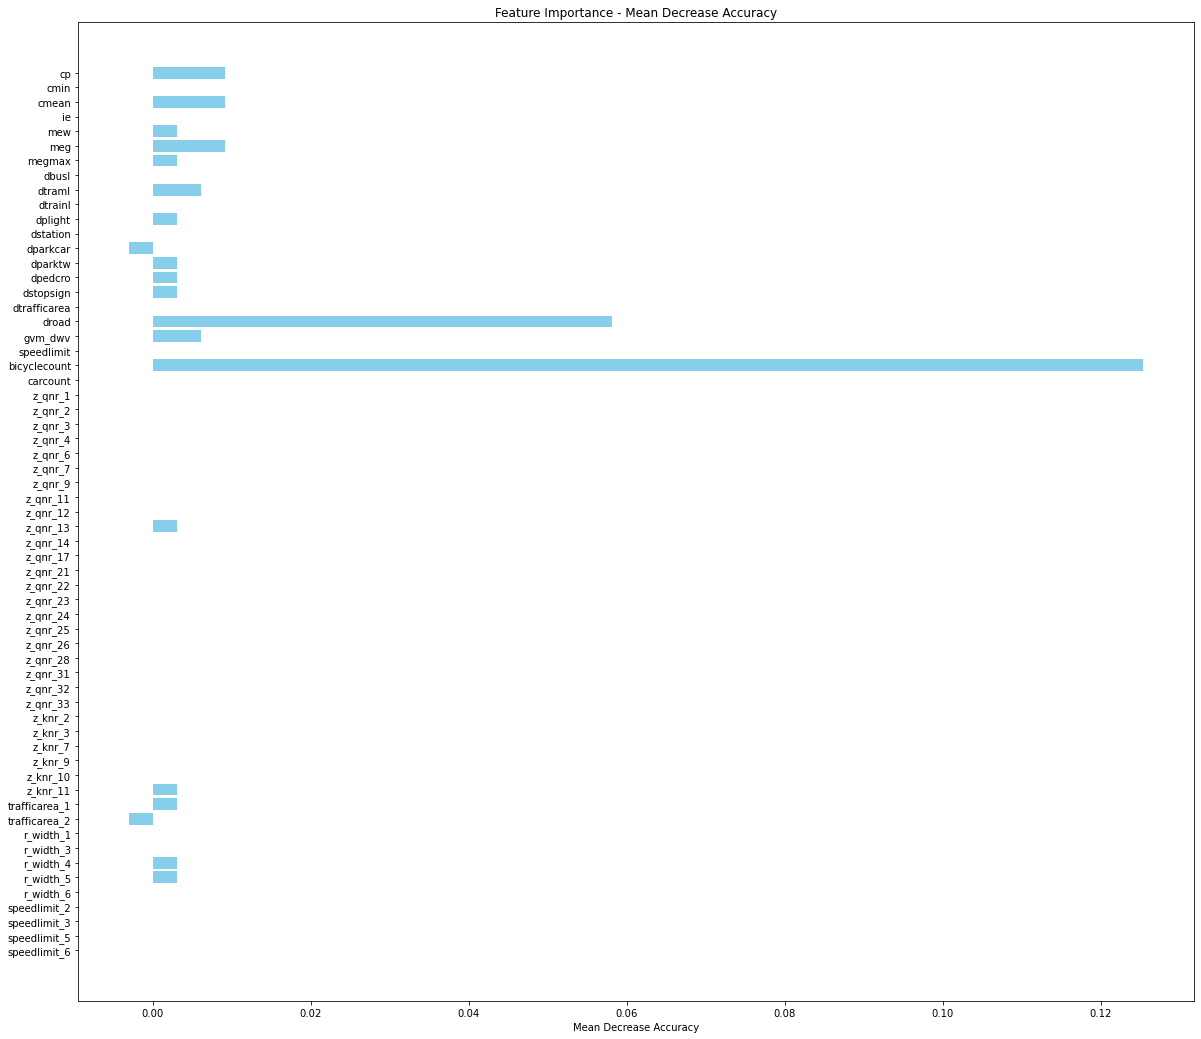

In [639]:
plt.figure(figsize=(20, 18))
plt.barh(cnvifnew, i_mda, color='skyblue')
plt.xlabel('Mean Decrease Accuracy')
plt.title('Feature Importance - Mean Decrease Accuracy')
plt.gca().invert_yaxis() 
plt.savefig('mda_rf3_cnvifnew_61.png')
plt.show()

In [689]:
# Permutation feature importance
result = permutation_importance(rfc, X_test, y_test, n_repeats=10, random_state=0, n_jobs=-1)
perm_imp_df = pd.DataFrame({'Feature': cnvifnew, 'Permutation Importance': result.importances_mean}).sort_values('Permutation Importance', ascending=False)
# print(perm_imp_df)

          Feature  Permutation Importance
20   bicyclecount                0.147706
17          droad                0.139755
5             meg                0.008563
4             mew                0.007951
9         dtrainl                0.007645
2           cmean                0.007339
19     speedlimit                0.007339
16   dtrafficarea                0.006422
14        dpedcro                0.006116
8          dtraml                0.005505
13        dparktw                0.004893
7           dbusl                0.004587
11       dstation                0.003976
10        dplight                0.003976
54      r_width_4                0.003670
55      r_width_5                0.003670
50  trafficarea_1                0.003670
18        gvm_dwv                0.003364
31       z_qnr_13                0.003364
15      dstopsign                0.002446


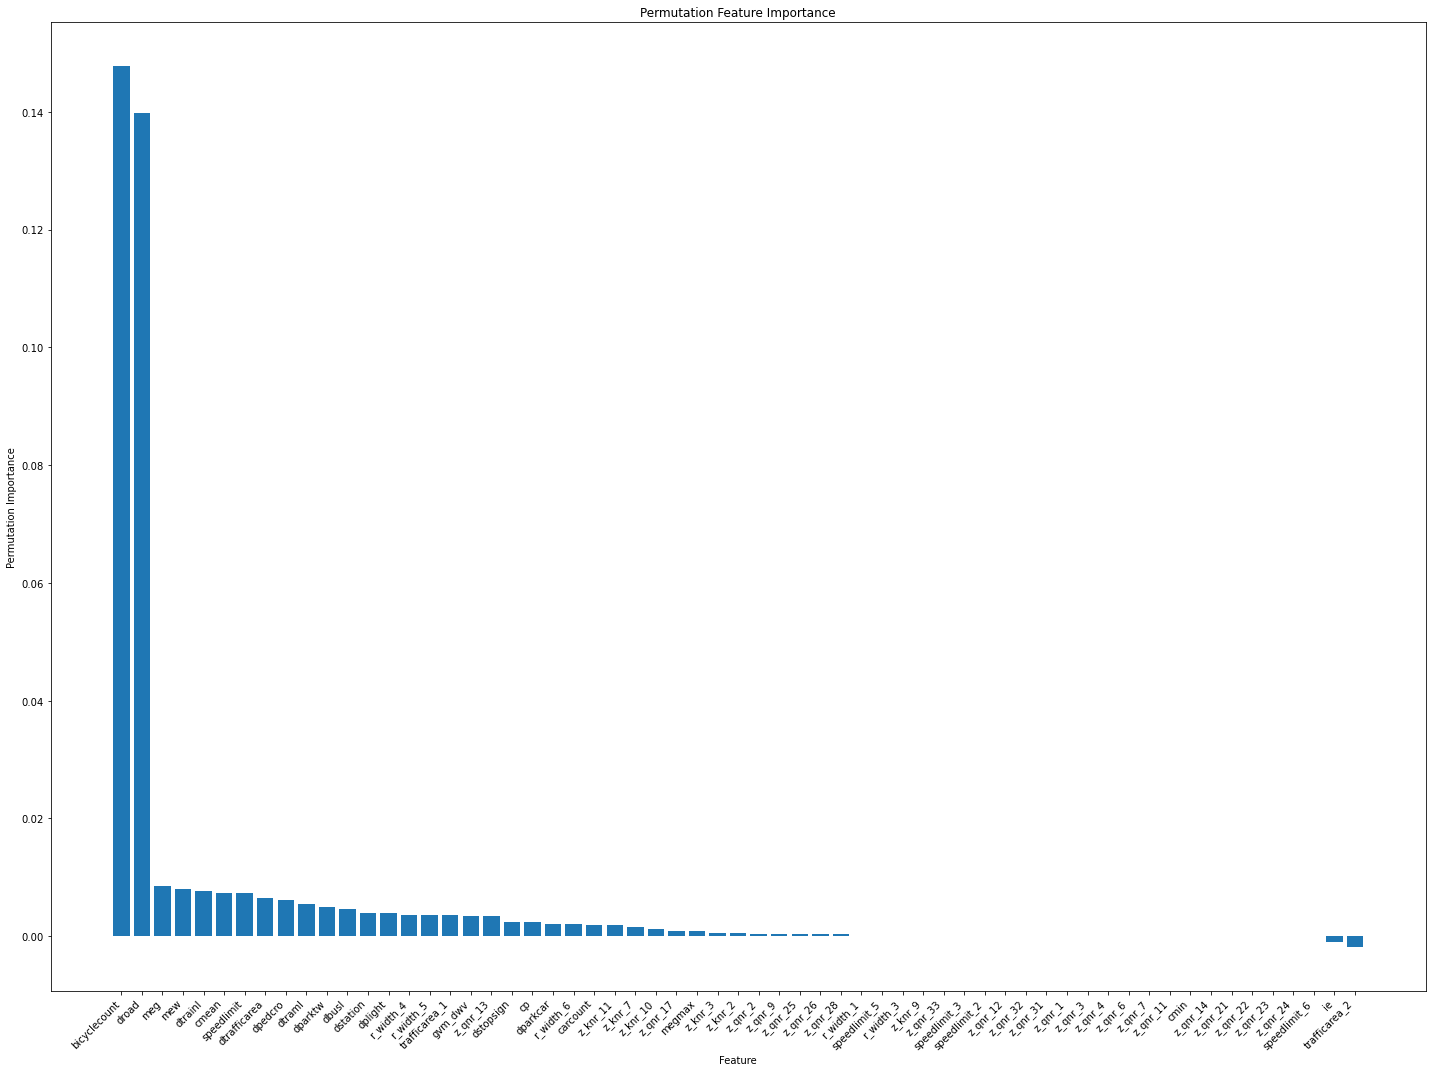

In [691]:
print(perm_imp_df.head(20))
plt.figure(figsize=(20, 15))
plt.bar(perm_imp_df['Feature'], perm_imp_df['Permutation Importance'])
plt.xlabel('Feature')
plt.ylabel('Permutation Importance')
plt.title('Permutation Feature Importance')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility
plt.tight_layout()
plt.savefig('pfi_rf3_cnvifnew_61.png')
plt.show()

In [ ]:
# svp_rf_importance_0.png (joblib0, of all 91 variables)
# svp_rf_importance_1.png (joblib1, of cnvif, 60 variables)
# svp_rf_importance_4.png (joblib2, of cntry1 = cnvif + curb variables, 63)
# svp_rf_importance_3.png (joblib3, of cnvifnew = cnvif + cmean 61 variables)

# svp_rf_importance_2.png (of cntryn)